<a href="https://colab.research.google.com/github/Devang-Malwadkar/MOBILE_PRICE_RANGE_PREDICTION/blob/main/MOBILE_PRICE_RANGE_PREDICTION_DEVANG_MALWADKAR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT :- MOBILE PRICE RANGE PREDICITION

## Project Type :- MACHINE LEARNING - CLASSIFICATION 

## Contribution :- Individual

# **Name :- DEVANG SANJAYKUMAR MALWADKAR**

# GitHub Link :-  https://github.com/Devang-Malwadkar/MOBILE_PRICE_RANGE_PREDICTION

# **VIDEO LINK :-** https://drive.google.com/drive/folders/1OavmTNgJB5860AWD1vsNPoE-0eQyQBdh?usp=share_link

# **PROJECT SUMMARY**

Nowadays, a cellphone is an essential accessory of a person. It is the fastest evolving and moving product in the technology market space. New mobiles with updated versions and new features are introduced into the market at a rapid pace. Thousands of mobiles are sold each day. In such a fast-paced and volatile market, a mobile company needs to set optimal prices to compete with its rivals.

In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market by applying various machine learning algorithms such as logistic regression, decision tree, random forest and k-nearest neighbors(knn).

# **PROBLEM DESCRIPTION**

BUSINESS PROBLEM OVERVIEW

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phoneleg - RAM Internal Memory, etc) and its selling price in this problem, we do not have to predict the actual price but a price range indicating how high the price is.


AIM 

In this project on the basis of mobile specification we are going to predicit the price of the mobile.

# **LETS BEGIN !!**

Import all the required libraries like pandas numpy and matplotlib etc. these libraries are used to load process and visualization of the data.



In [ ]:
#let's import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


MOUNT THE DRIVE AND IMPORT THE DATASET

In [ ]:
#MOUNT THE DRIVE AND IMPORT THE DATASET
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_mobile_price_range.csv')

UNDERSTAND MORE ABOUT DATA

SUMMARY OF DATA

In [ ]:
#SUMMARY OF DATA
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#DATA INFORMATION
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#Getting the shape of dataset with rows and columns
dataset.shape

(2000, 21)

In [ ]:
#FINDING THE DUPLICATE VALUES
len(dataset[dataset.duplicated()])

0

In [ ]:
#GETTING THE NULL VALUES 
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

GRAPHICALLY SHOWING THE PERCENTAGE OF MISSING VALUES/NULL VALUES

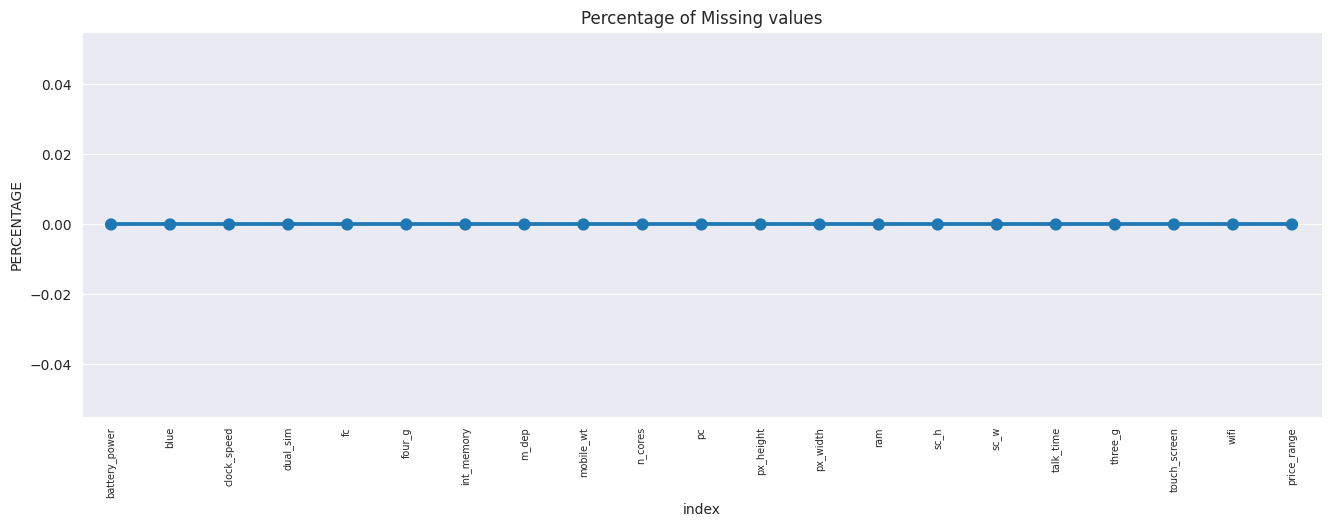

In [ ]:
#GRAPHICALLY SHOWING THE PERCENTAGE OF MISSING VALUES 
missing = pd.DataFrame((dataset.isnull().sum())*100/dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
#DESCRIBE THE DATASET TO GET THE VALUES OF EACH SPECIFICATION
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
#LOOKING FOR THE UNIQUE
dataset.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#GETTING THE RANGE OF PRICE AND ITS VALUE COUNT
dataset.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
# Dataset Describe
dataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**UNDERSTANDING THE VARIABLES.**

In [ ]:
#Getting all the columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

 **Variables Description**

.**Battery_power** - Total energy a battery can store in one time measured in mAh

.**Blue** - Has bluetooth or not

.C**lock_speed** - speed at which microprocessor executes instructions

.**Dual_sim** - Has dual sim support or not

.**Fc** - Front Camera mega pixels

.**Four_g**- Has 4G or not

**.Int_memory** - Internal Memory in Gigabytes

.**M_dep** - Mobile Depth in cm

.**Mobile_wt** - Weight of mobile phone

**.N_cores** - Number of cores of processor

**.Pc** - Primary Camera mega pixels

**.Px_height** - Pixel Resolution Height

**.Px_width** - Pixel Resolution Width

.Ram  - Random Access Memory in Mega

.Touch_screen - Has touch screen or not

.Wifi - Has wifi or not

.Sc_h - Screen Height of mobile in cm

.Sc_w - Screen Width of mobile in cm

.Talk_time - longest time that a single battery charge will last when you are

.Three_g - Has 3G or not

.Wifi - Has wifi or not

.Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

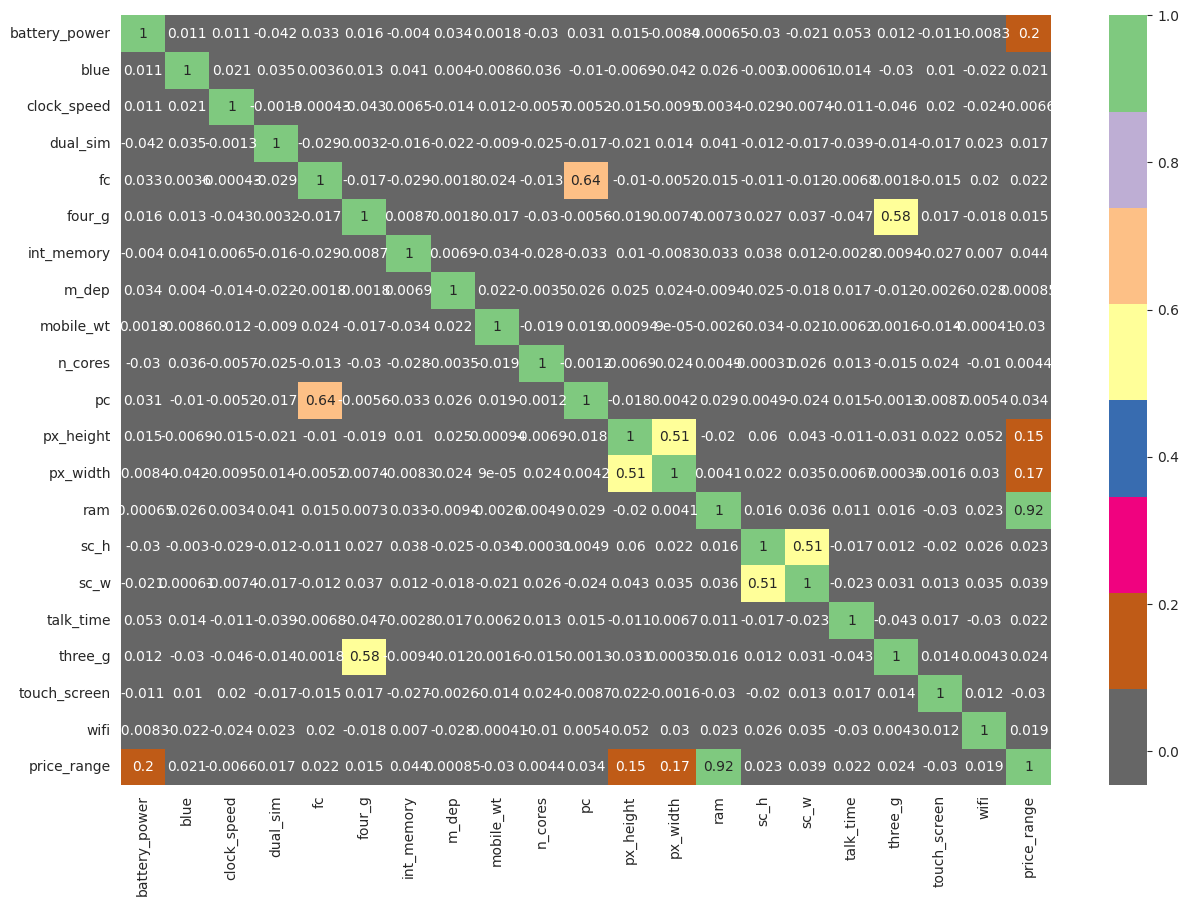

In [ ]:

# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()
     


 Check Unique Values for each variable. 

In [ ]:

# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


In [ ]:

pd.pivot_table(dataset, index='price_range', values=['battery_power',  'clock_speed' , 'fc','int_memory', 'mobile_wt', 
                                                       'pc', 'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']).T

price_range,0,1,2,3
battery_power,1116.9020,1228.8680,1228.3200,1379.9840
clock_speed,1.5502,1.4886,1.5298,1.5204
fc,4.0840,4.3400,4.4980,4.3160
int_memory,31.1740,32.1160,30.9200,33.9760
mobile_wt,140.5520,140.5100,143.6140,136.3200
pc,9.5740,9.9240,10.0180,10.1500
px_height,536.4080,666.8920,632.2840,744.8480
px_width,1150.2700,1251.9080,1234.0460,1369.8380
ram,785.3140,1679.4900,2582.8160,3449.2320
sc_h,12.3240,12.2120,12.0100,12.6800


In [ ]:

# Write your code to make your dataset analysis ready.
data_num = dataset[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

data_cat = dataset[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

 ***Data Wrangling***

Data Wrangling Code
Light Data Exploration

For numeric data
Made histograms to understand distributions Corrplot

Pivot table comparing survival rate across numeric variables

For Categorical Data
Made bar charts to understand balance of classes

Made pivot tables to understand relationship with survival

# **DATA VISUALIZATIONS AND UNDERSTANDIND IT MORE EASY.**

Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64
 


<Axes: ylabel='price_range'>

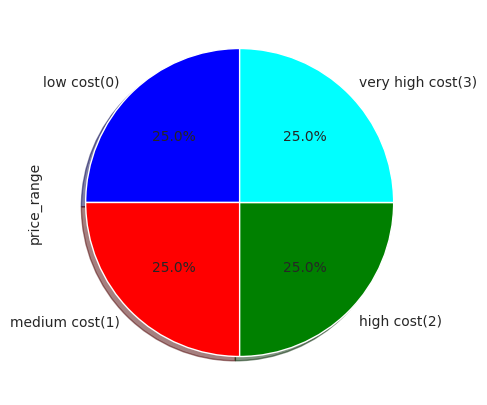

In [ ]:

# Chart - 1 visualization code
# Dependent Column Value Counts
print(dataset.price_range.value_counts())
print(" ")
# Dependent Variable Column Visualization
dataset['price_range'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                              autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=["low cost(0)", "medium cost(1)", "high cost(2)", "very high cost(3)"],
                               colors=['blue','red','green','cyan'],
                               explode=[0,0,0,0]
                              )

FROM the above pie chart total 2000 dataset. i got to know that there are 500 mobile data which are low cost which is 25%, 500 mobile data which are medium cost which are 25% and 500 mobile data which are high range cost which is 25% and lastly 500 more mobile data which are very high cost which is 25% of the whole mobile  data given in the dataset. 

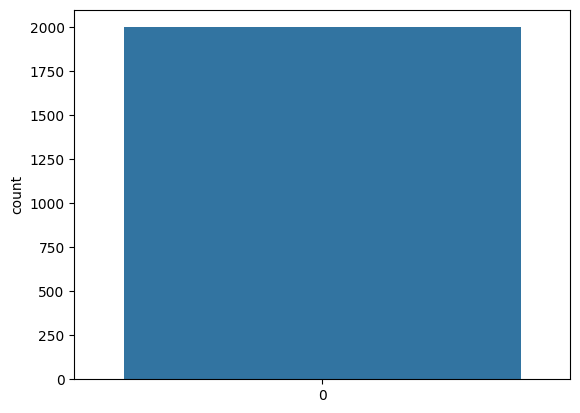

In [ ]:
# Chart - 2 visualization code
# classes
sns.countplot(dataset['price_range'])
plt.show()

CHECKING ALL THE NUMERICAL COLUMNS AND THE FREQUENCY 

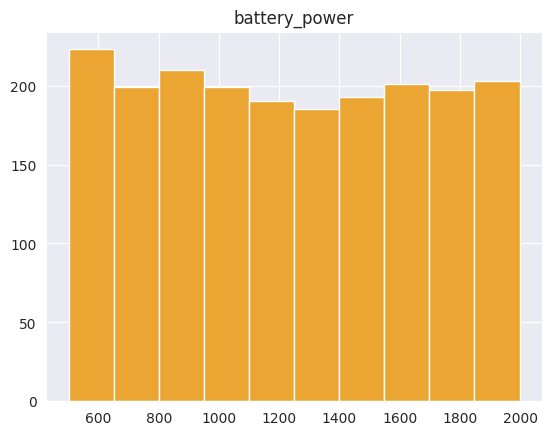

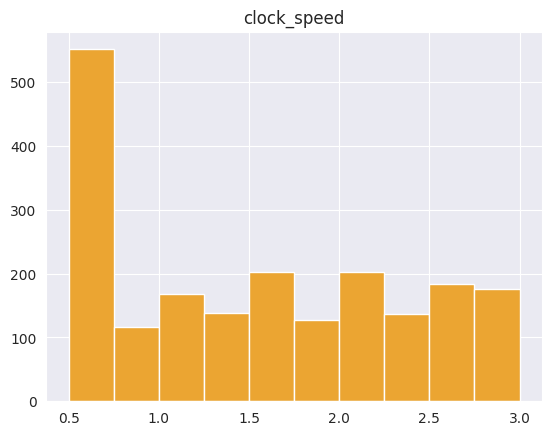

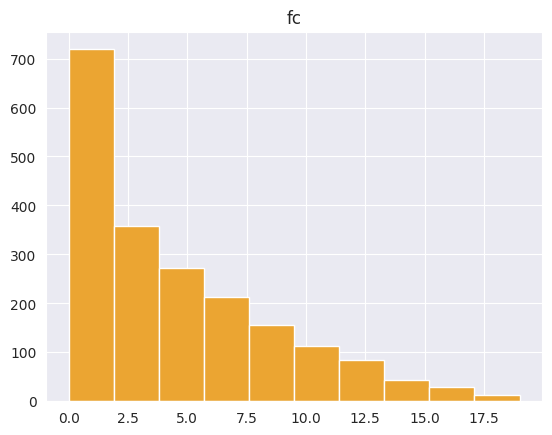

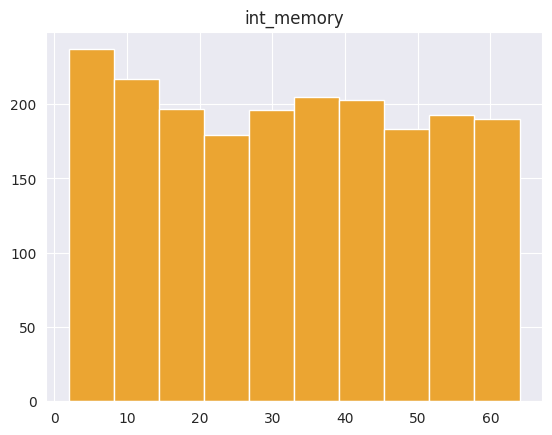

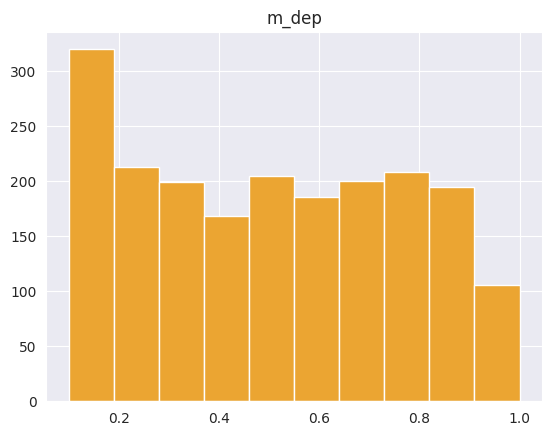

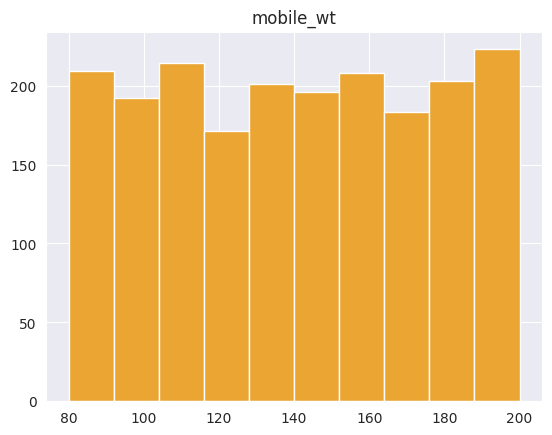

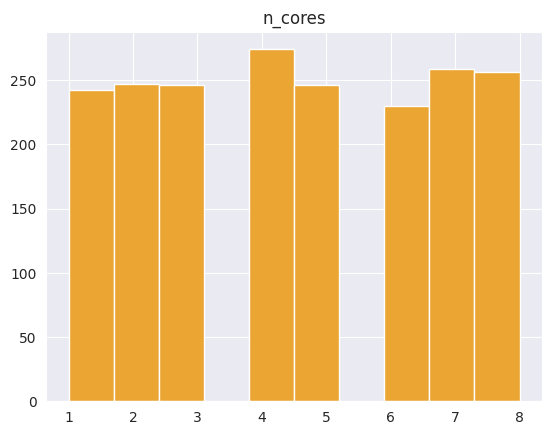

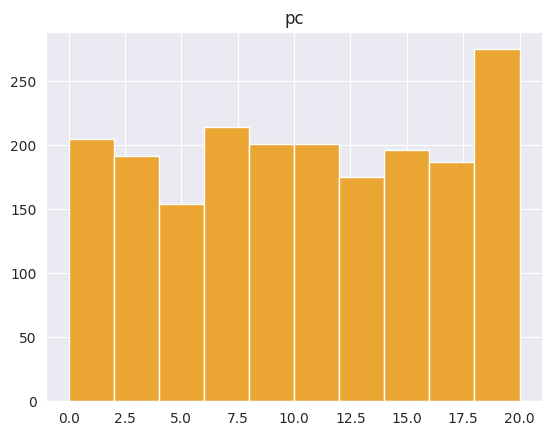

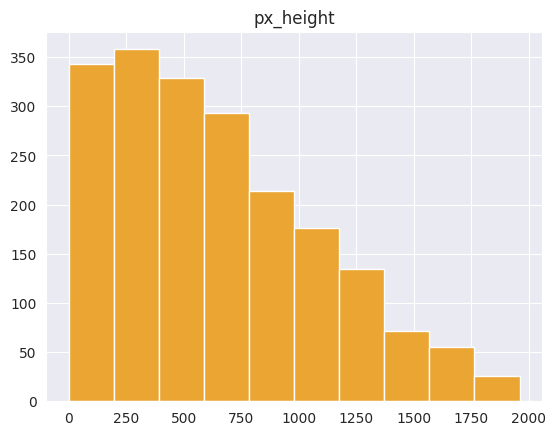

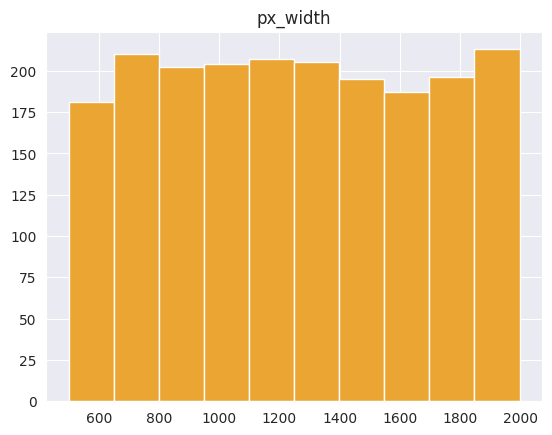

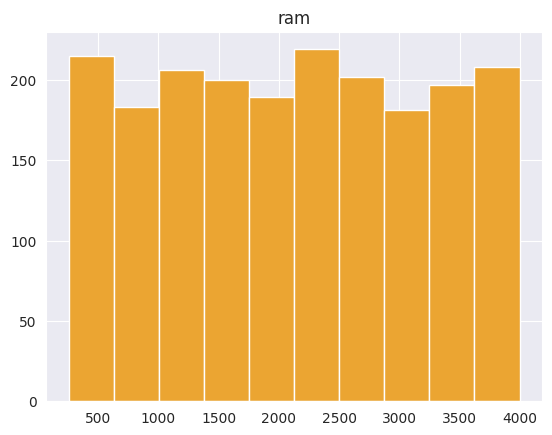

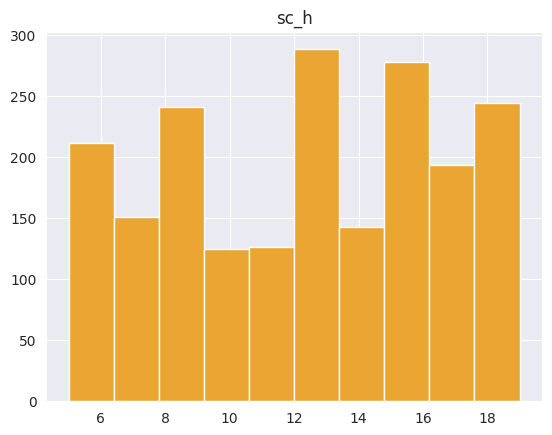

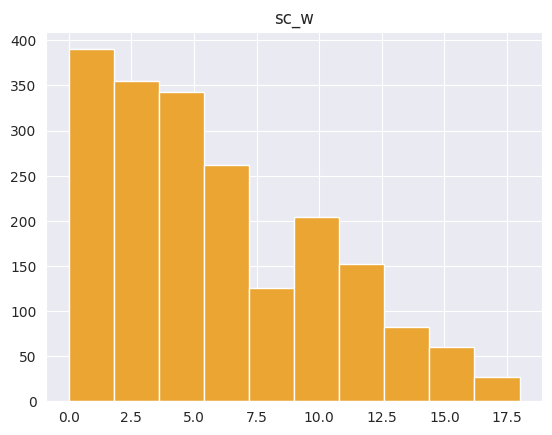

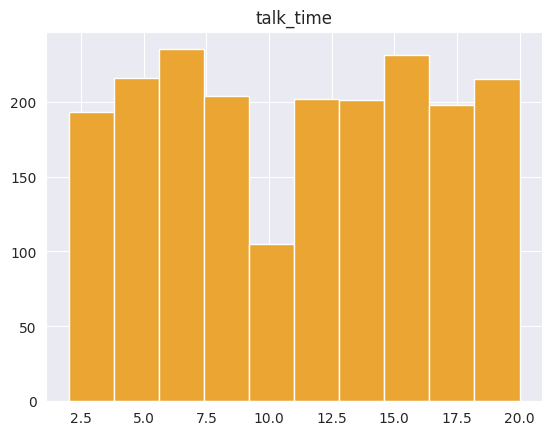

In [ ]:

# Chart - 3 visualization code
for i in data_num.columns:
    plt.hist(dataset[i],color='#EBA532')
    plt.title(i)
    plt.show()

In [ ]:
# Write your code to make your dataset analysis ready.
data_num = dataset[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

data_cat = dataset[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [ ]:

data_num

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [ ]:

data_cat

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


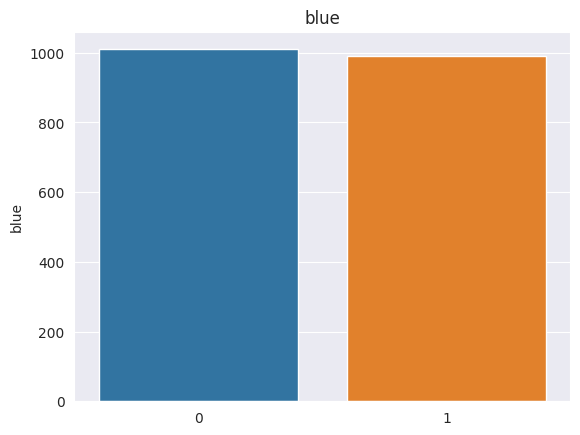

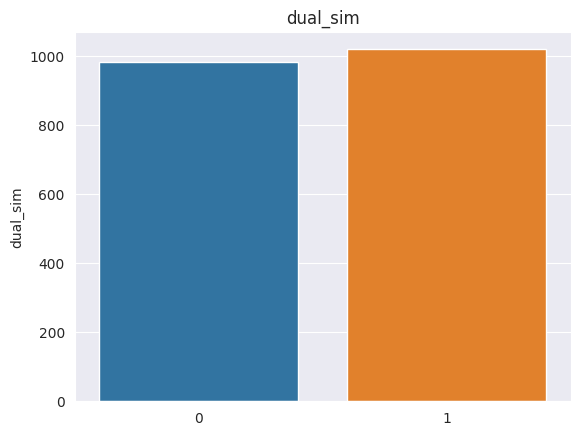

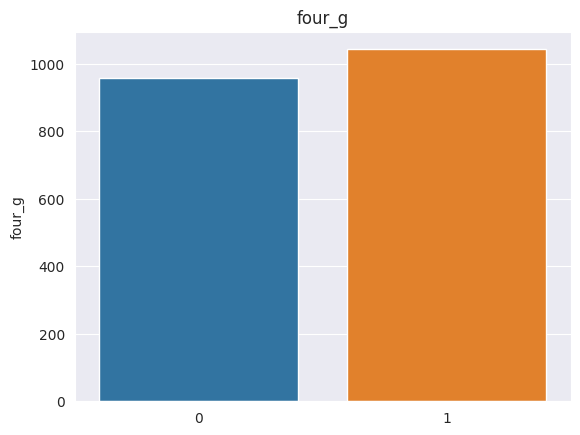

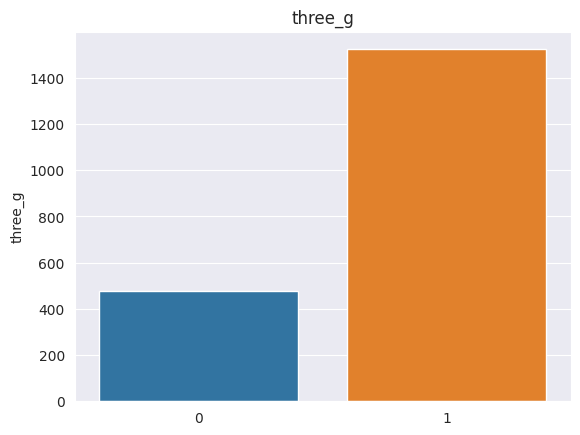

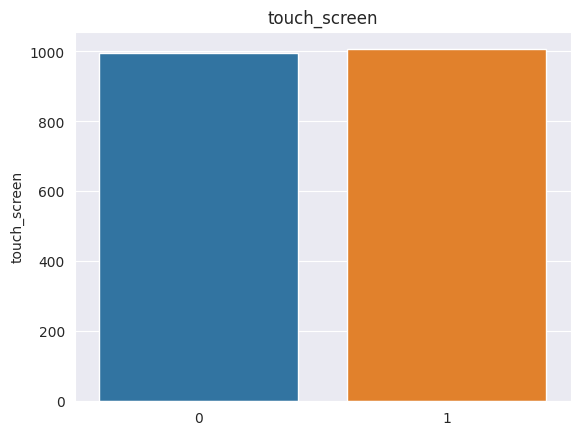

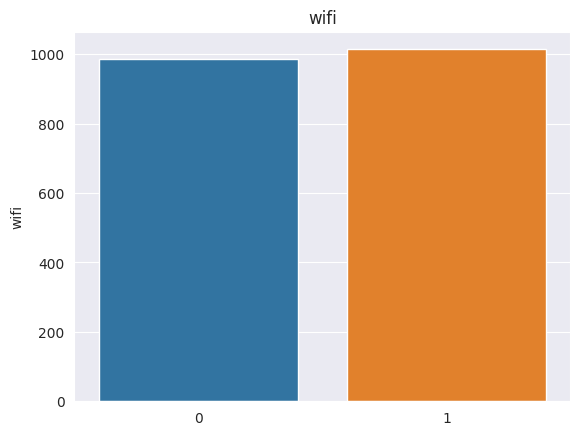

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart - 4 visualization code DATA_CAT.CLOUMN
for i in data_cat.columns:
    ax = sns.barplot(x=data_cat[i].value_counts().index, y=data_cat[i].value_counts())
    ax.set_title(i)
    plt.show()


     

In [ ]:

for i in data_cat:
    print(pd.pivot_table(dataset,index='price_range',columns=i, values='ram'))
    print("=="*20)

blue                   0            1
price_range                          
0             779.603113   791.353909
1            1646.984314  1713.322449
2            2592.439689  2572.637860
3            3445.161826  3453.019305
dual_sim               0            1
price_range                          
0             767.612000   803.016000
1            1661.848980  1696.439216
2            2545.438247  2620.493976
3            3410.038298  3483.988679
four_g                 0            1
price_range                          
0             801.315353   770.424710
1            1661.605042  1695.736641
2            2607.498024  2557.534413
3            3451.875556  3447.069091
three_g                0            1
price_range                          
0             821.220472   773.088472
1            1653.295082  1687.944444
2            2631.716814  2568.537468
3            3437.121739  3452.849351
touch_screen            0            1
price_range                           
0         

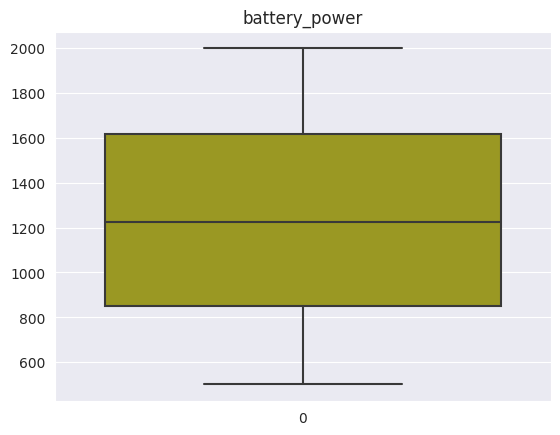

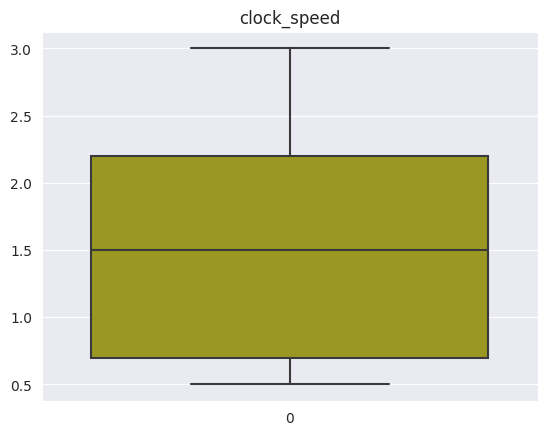

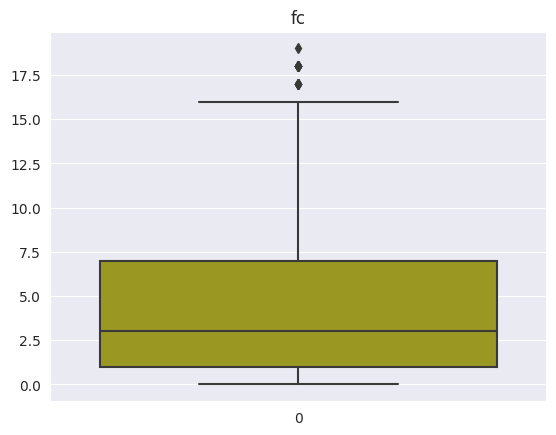

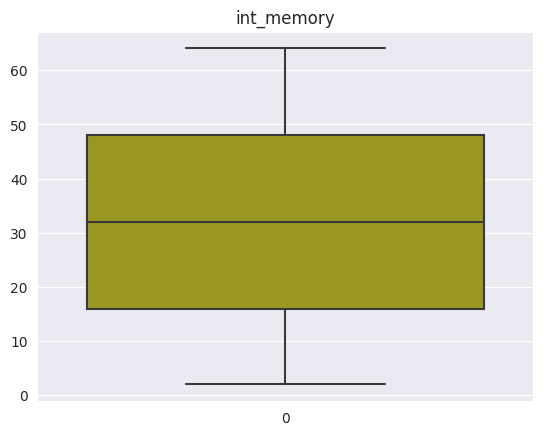

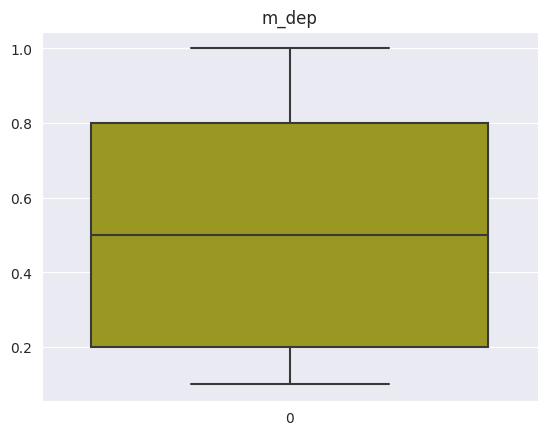

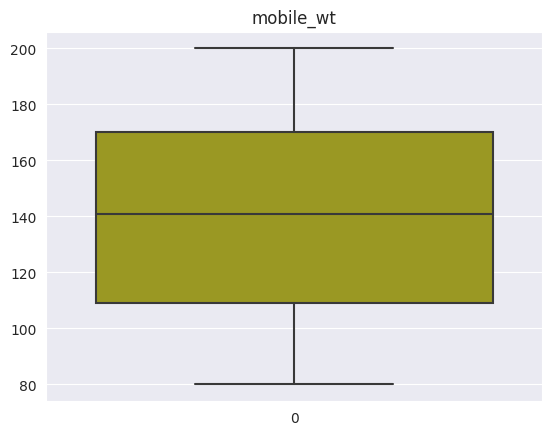

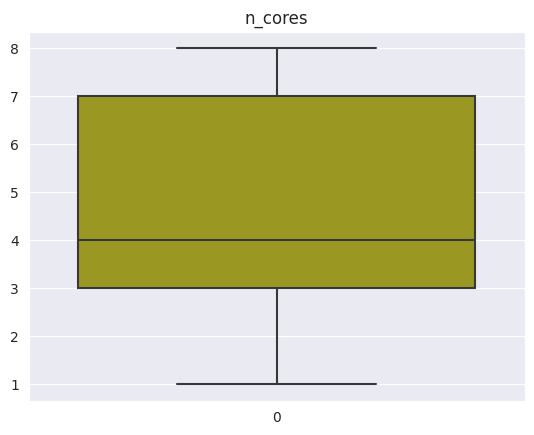

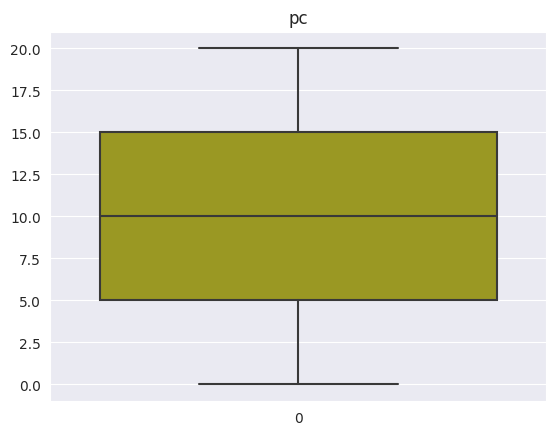

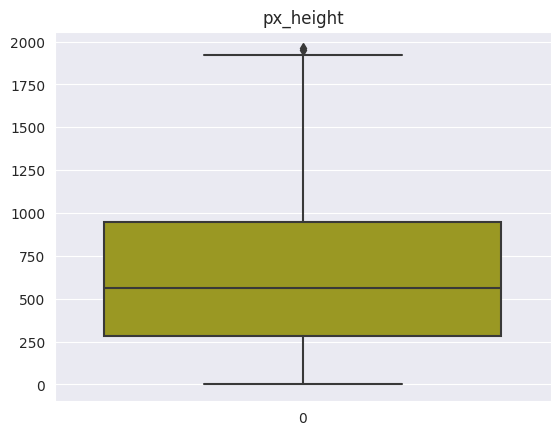

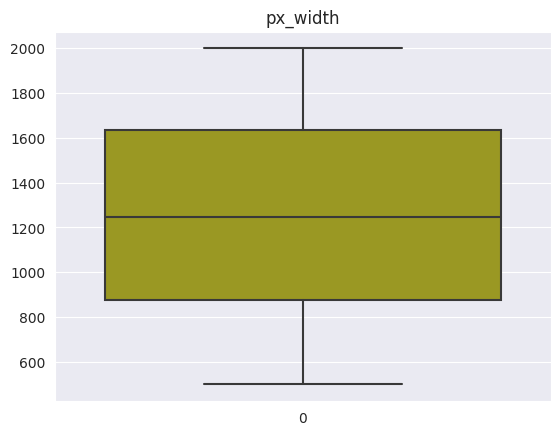

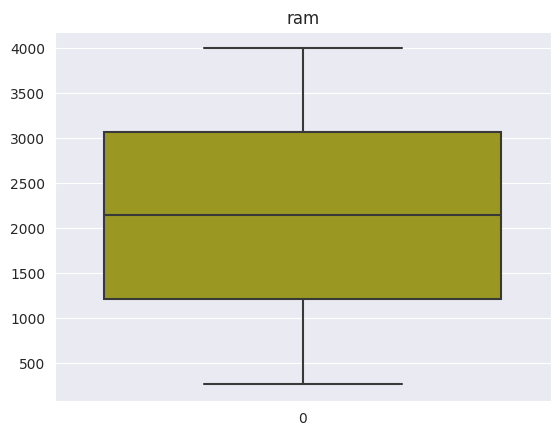

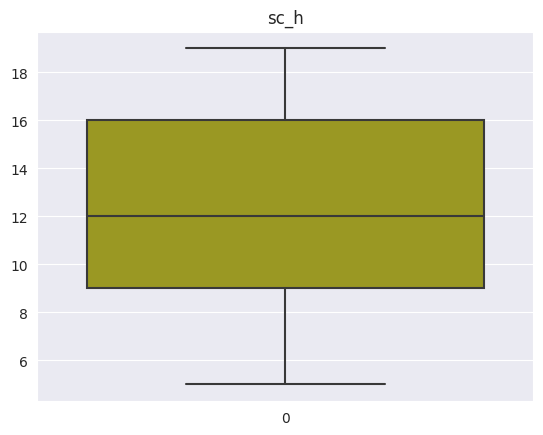

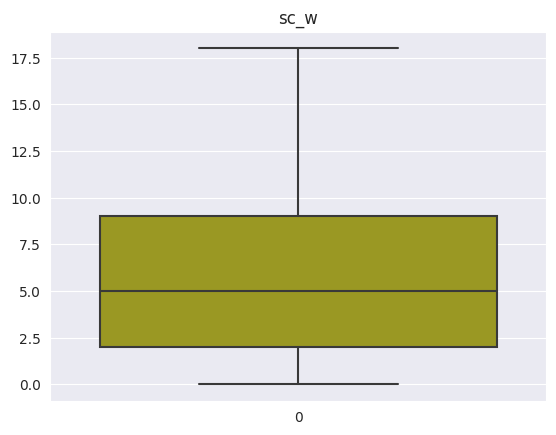

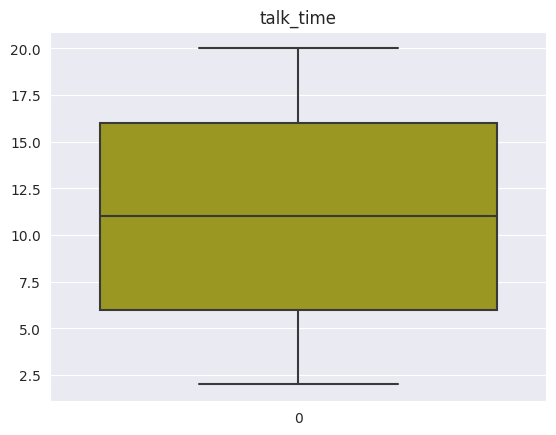

In [ ]:

# Chart - 5 visualization code
# dealing with outliers values
for i in data_num.columns:
    sns.boxplot(data_num[i],color='#AEAB0F')
    plt.title(i)
    plt.show()

almost all the columns are symmetrical distributed and the mean is nearly the same with medium ofnumerical columns 

In [ ]:

binary_features = [ 'four_g', 'three_g']

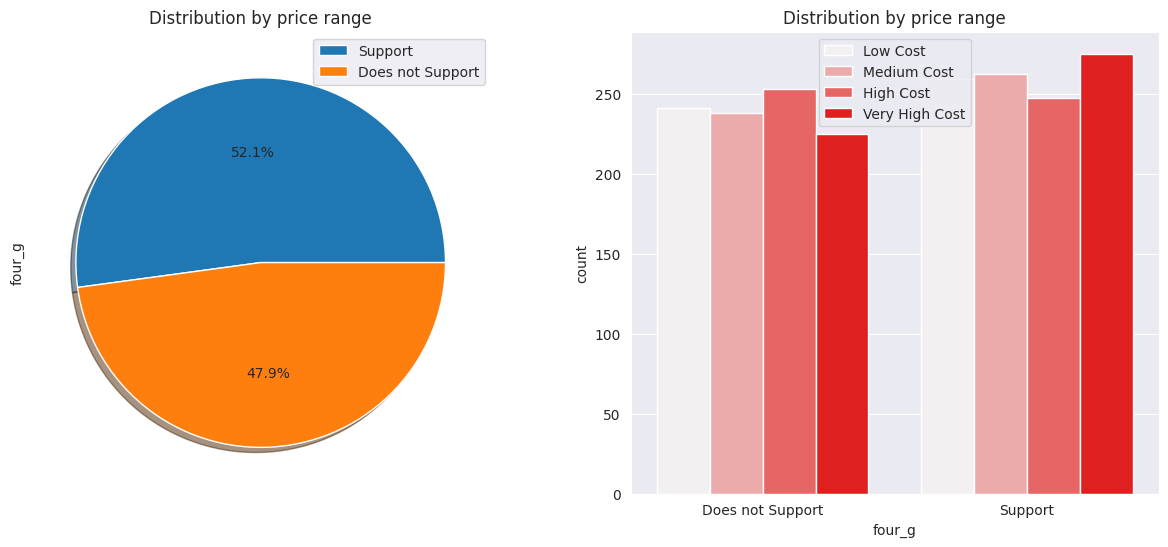

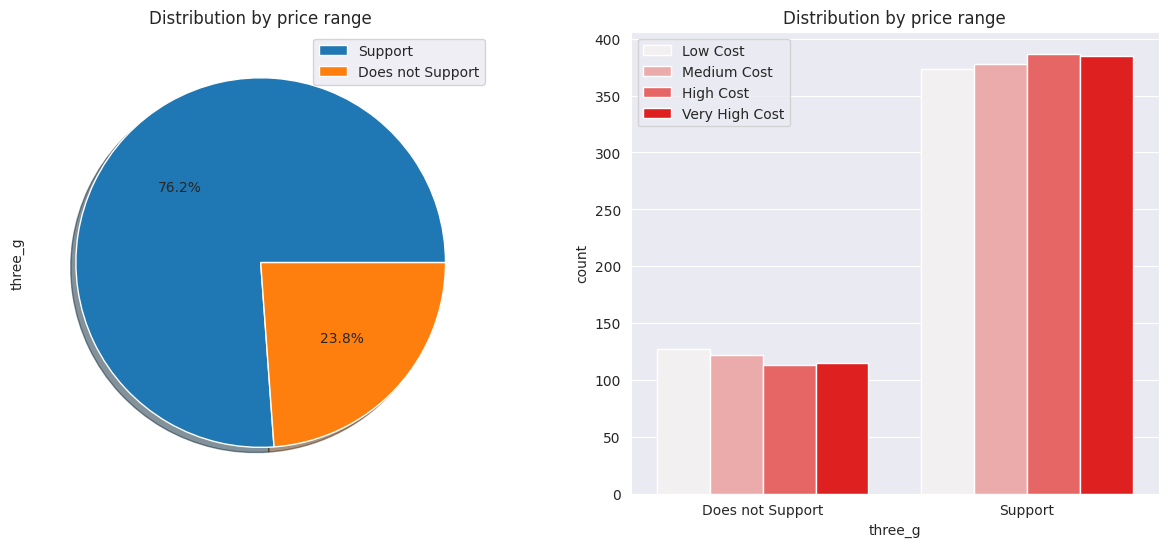

In [ ]:

# Chart - 6 visualization code
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  dataset[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = dataset, ax = ax2, color = 'Red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

<Axes: xlabel='price_range', ylabel='battery_power'>

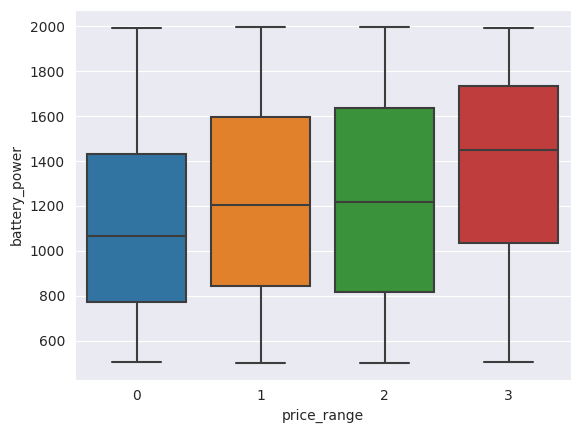

In [ ]:
#batter power VS price_range
# Chart - 7 visualization code
sns.boxplot(x="price_range", y="battery_power",data=dataset)

Text(0.5, 0, 'MegaPixels')

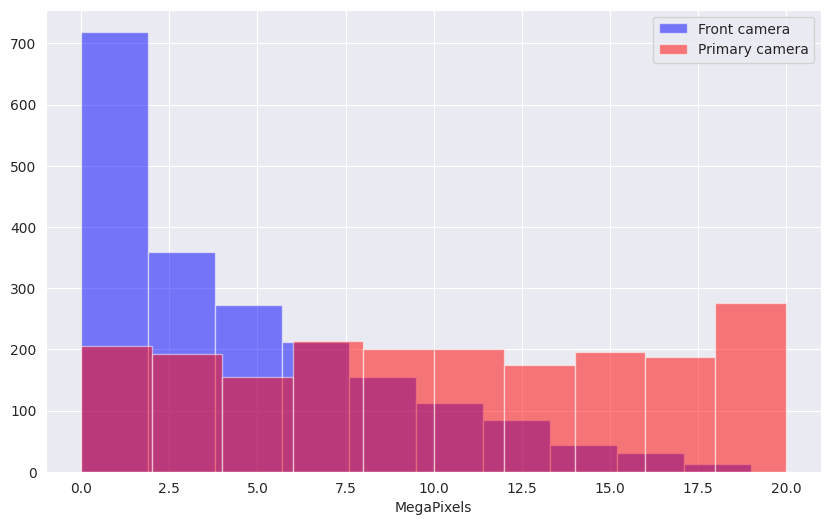

In [ ]:

# Chart - 8 visualization code
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

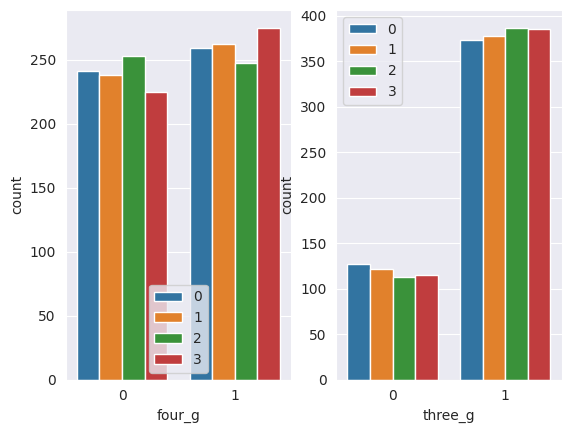

In [ ]:
# Chart - 9 visualization code
plt.figure(1)
plt.subplot(121)
sns.countplot(x = 'four_g',hue= 'price_range',data  = dataset)
plt.legend()
plt.subplot(122)
sns.countplot(x = 'three_g',hue= 'price_range',data  = dataset)
plt.legend()

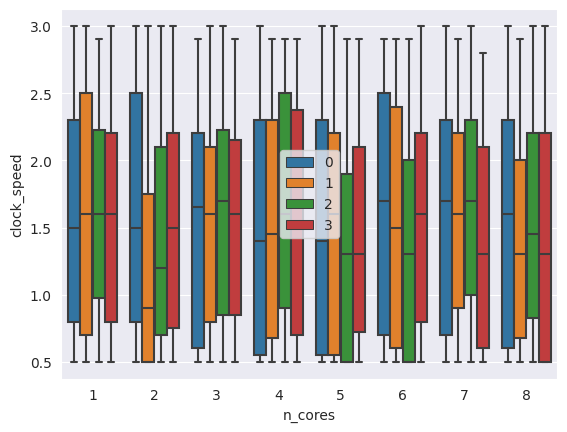

In [ ]:

# Chart - 10 visualization code
sns.boxplot(x = 'n_cores',y = 'clock_speed',hue = 'price_range',data = dataset)
plt.legend()
plt.show()

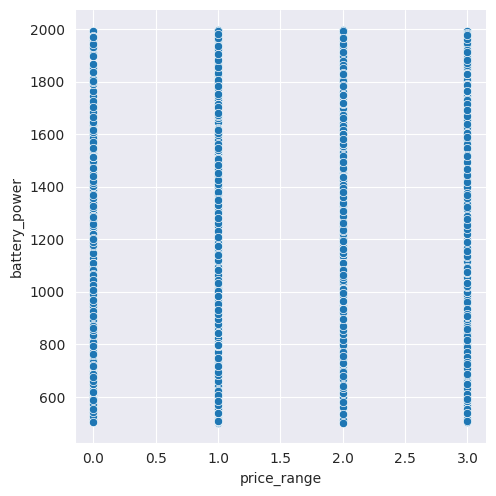

In [ ]:

# Chart - 11 visualization code
#Visualise the relationship between the two independent variables and the depenedent variable using scatterplots
sns.pairplot(dataset , y_vars = 'battery_power' , x_vars = 'price_range' , size = 5)

In [ ]:
#WRITING THE CODE TO ANALYSIS THE DATA 
#CREATING THE COPY OF DATASET AND NAMING IT TO df
df = dataset.copy()
#checking the mobile price range belongs to 0
print("number of mobile belong to the price_range 0 is :", len(df[df['price_range']==0]))
#checking the mobile price range belongs to 1
print("number of mobile belong to the price_range 1 is :", len(df[df['price_range']==1]))
#checking the mobile price range belongs to 2
print("number of mobile belong to the price_range 2 is :", len(df[df['price_range']==2]))
#checking the mobile price range belongs to 3
print("number of mobile belong to the price_range 3 is :", len(df[df['price_range']==3]))

number of mobile belong to the price_range 0 is : 500
number of mobile belong to the price_range 1 is : 500
number of mobile belong to the price_range 2 is : 500
number of mobile belong to the price_range 3 is : 500


In [ ]:
#getting the value count of price range
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
#mobile phone grouped by 4g support or not support
df.groupby('four_g')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False)

,four_g,price_range,Count
4,1,3,275
5,1,1,262
6,1,0,259
0,0,2,253
7,1,2,247
1,0,0,241
2,0,1,238
3,0,3,225


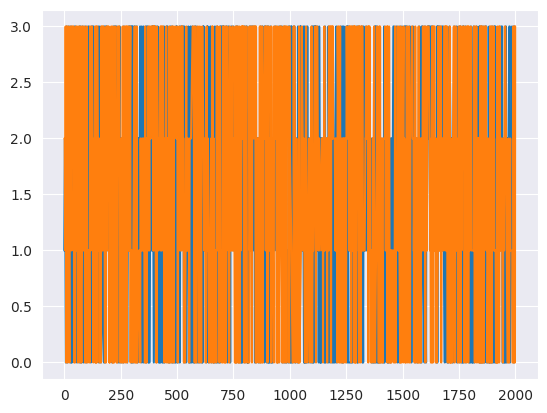

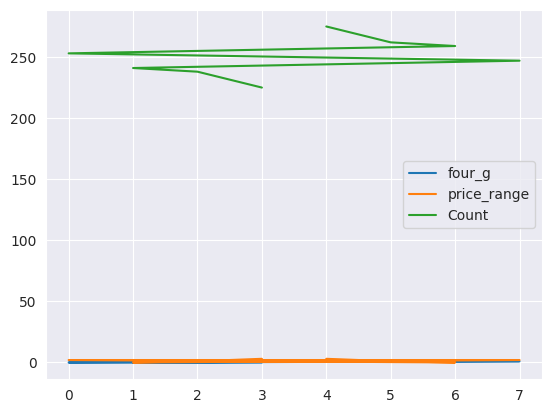

In [ ]:
#mobile phone grouped by 4g support or not support and plotting the graph
df.groupby('four_g')['price_range'].plot()
df.groupby('four_g')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False).plot()
plt.show()

In [ ]:
#mobile phone grouped by 3g support or not support
df.groupby('three_g')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False)

,three_g,price_range,Count
4,1,2,387
5,1,3,385
6,1,1,378
7,1,0,373
0,0,0,127
1,0,1,122
2,0,3,115
3,0,2,113


<Axes: >

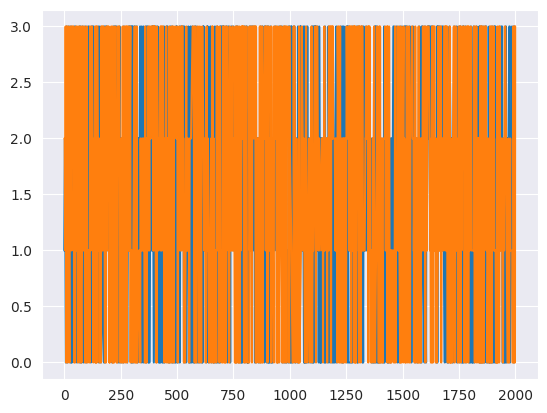

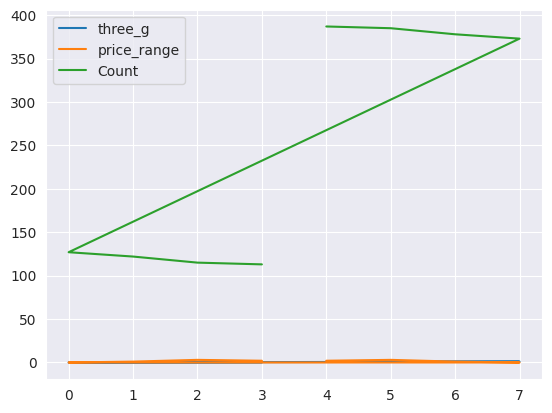

In [ ]:
#mobile phone grouped by 3g support or not support and plotting the graph
df.groupby('four_g')['price_range'].plot()
df.groupby('three_g')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False).plot()

In [ ]:
#mobile phone grouped by blue support or not support
df.groupby('blue')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False)

,blue,price_range,Count
4,1,3,259
0,0,0,257
1,0,2,257
2,0,1,255
5,1,1,245
6,1,0,243
7,1,2,243
3,0,3,241


<Axes: >

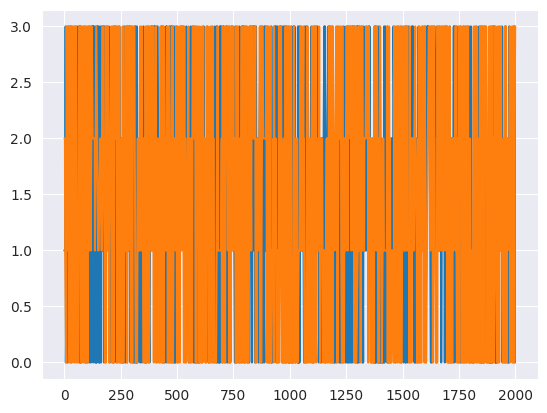

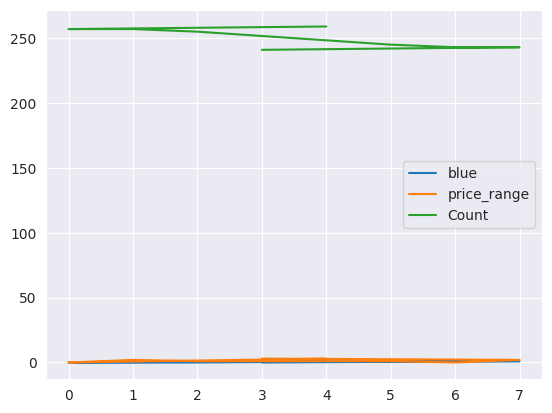

In [ ]:
#mobile phone grouped by blue support or not support and plotting the graph
df.groupby('blue')['price_range'].plot()
df.groupby('blue')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False).plot()

In [ ]:
#mobile phone grouped by dual sim support or not support
df.groupby('dual_sim')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False)

,dual_sim,price_range,Count
4,1,3,265
5,1,1,255
0,0,2,251
1,0,0,250
6,1,0,250
7,1,2,249
2,0,1,245
3,0,3,235


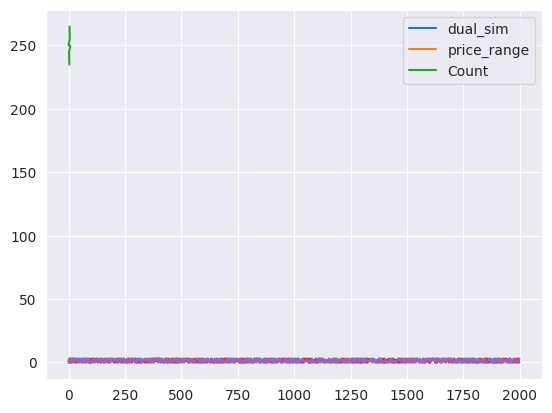

In [ ]:
#mobile phone grouped by dual sim support or not support plotting the graph
df.groupby('dual_sim')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False).plot() 
df.groupby('dual_sim')['price_range'].plot()
plt.show()

In [ ]:
#mobile phone grouped by touch screen support or not support
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False)

,touch_screen,price_range,Count
0,0,2,265
4,1,0,262
5,1,1,261
1,0,3,252
6,1,3,248
2,0,1,239
3,0,0,238
7,1,2,235


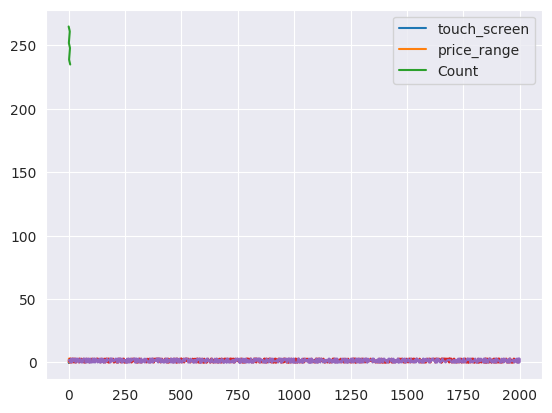

In [ ]:
#mobile phone grouped by touch screen support or not support and plotting the graph
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name='Count').sort_values(["Count"],ascending = False).plot()
df.groupby('touch_screen')['price_range'].plot()
plt.show()

In [ ]:
df['px_count'] = df['px_width']*df['px_height']

In [ ]:
#SHOW PRICE RANGE WITH DECREASING PIXEL COUNT VALUES
df.sort_values(["px_count"], ascending=False)[['price_range', 'px_count']].head(10)

,price_range,px_count
988,3,3886306
1771,2,3847480
1017,3,3744520
1397,0,3720318
894,2,3711360
1615,3,3703024
260,1,3690192
1163,2,3649920
148,2,3642884
305,1,3629598


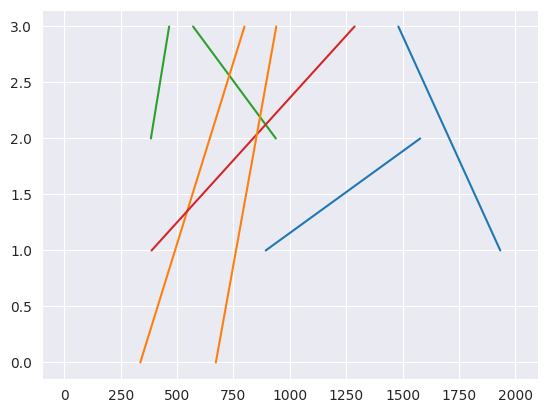

In [ ]:
df.groupby('px_count')['price_range'].plot()
plt.show()

In [ ]:
#assign the numerical coulmn to variavle
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

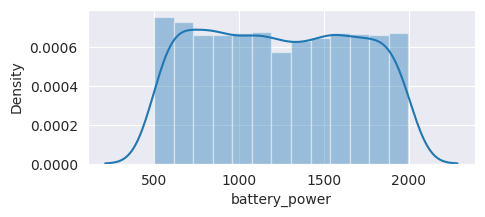

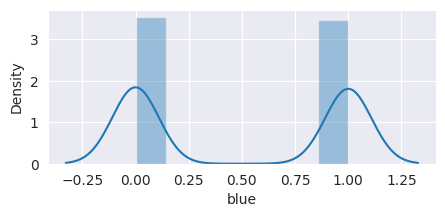

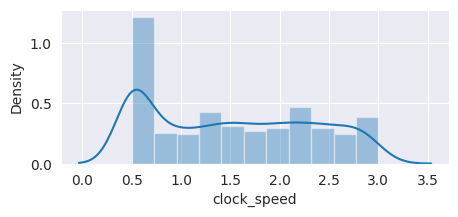

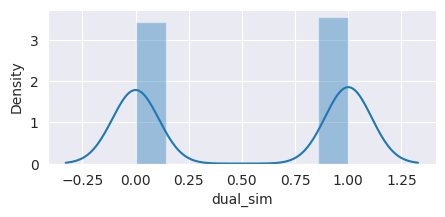

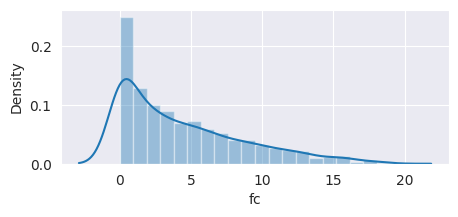

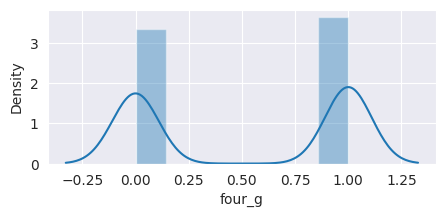

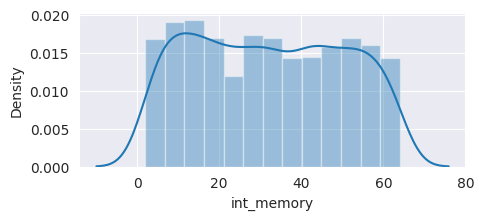

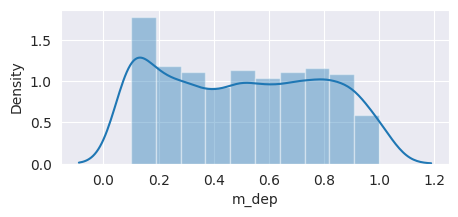

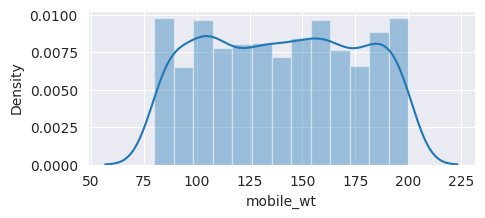

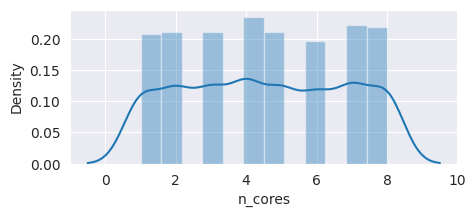

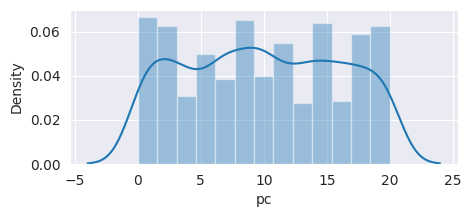

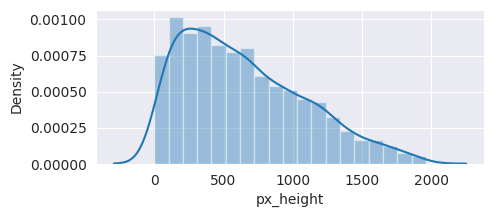

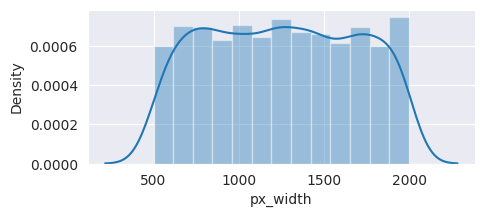

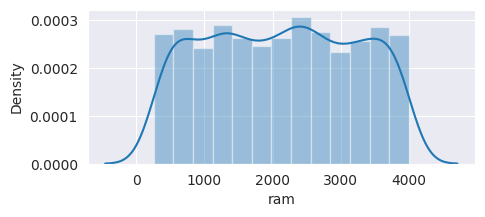

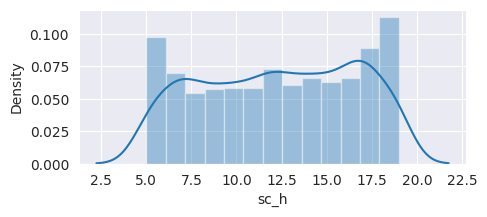

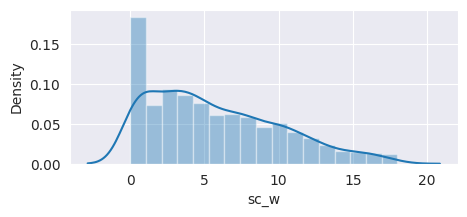

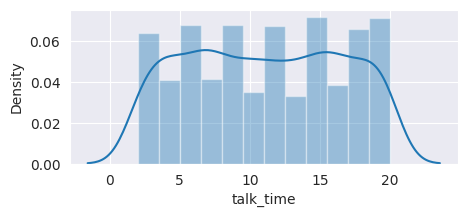

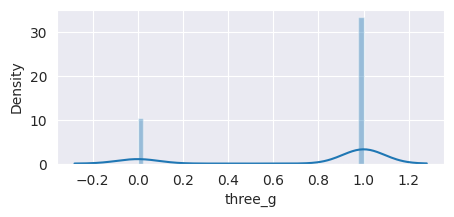

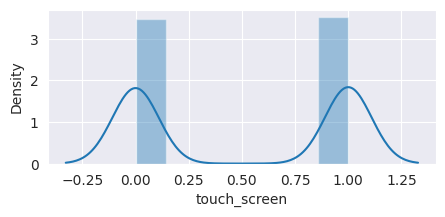

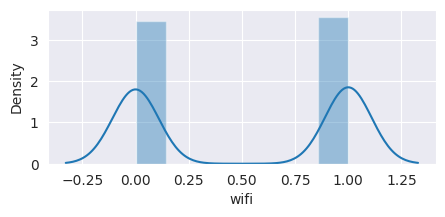

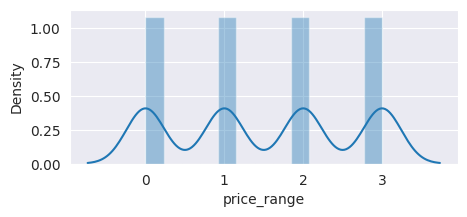

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(5,2))
  sns.distplot(x=dataset[col])
  plt.xlabel(col)
plt.show()

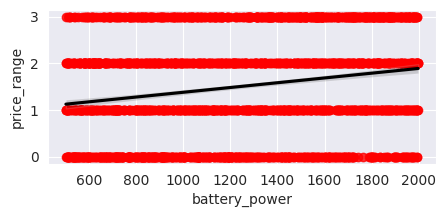

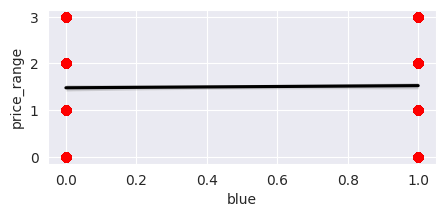

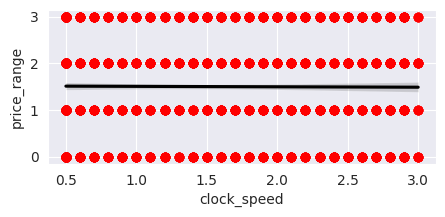

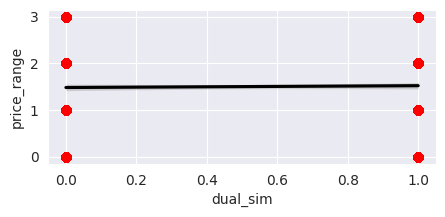

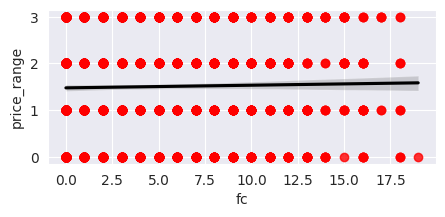

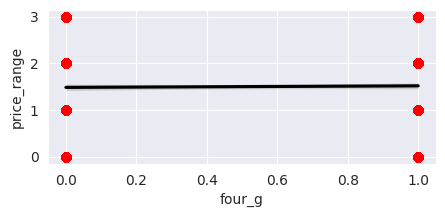

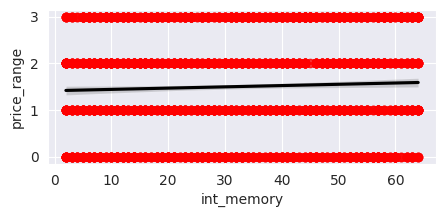

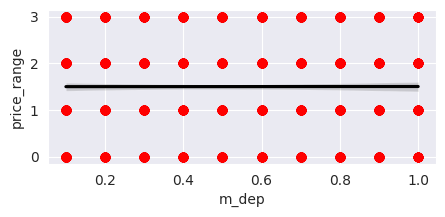

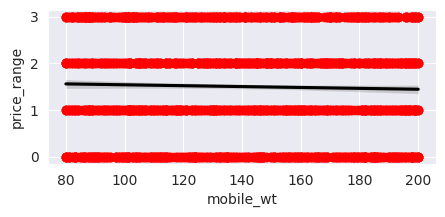

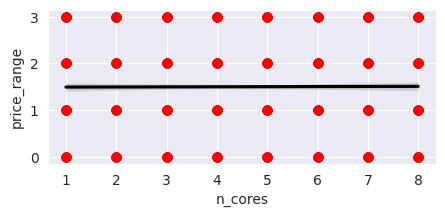

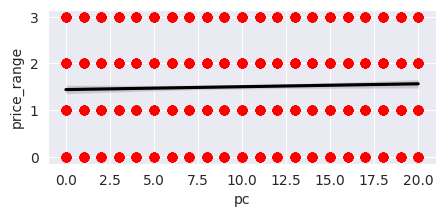

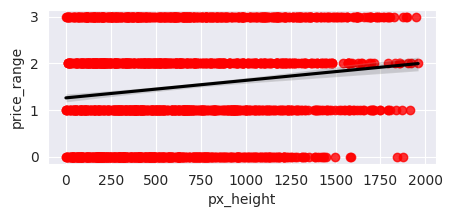

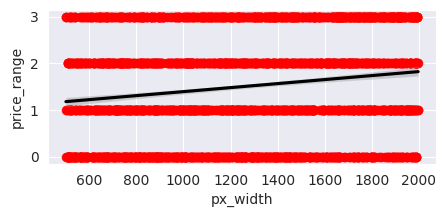

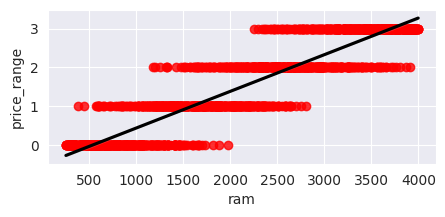

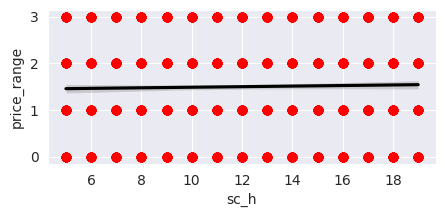

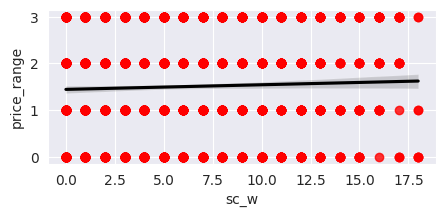

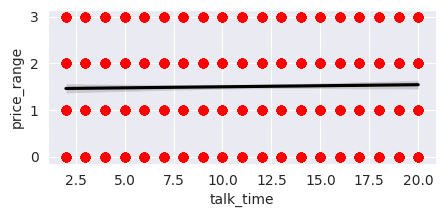

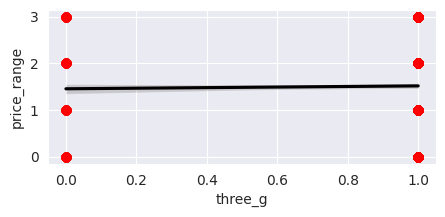

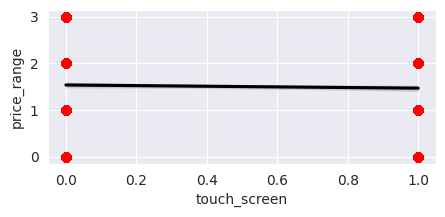

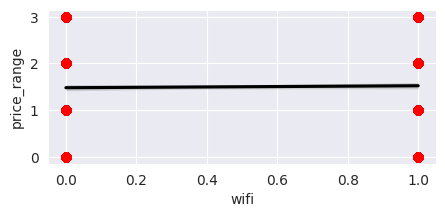

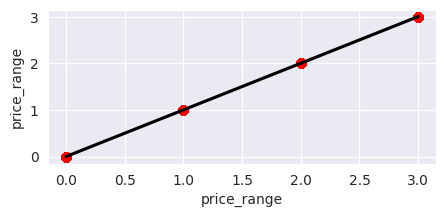

In [ ]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(5,2))
  sns.regplot(x=dataset[col],y=dataset['price_range'],scatter_kws={"color": 'red'}, line_kws={"color": "black"})

# **FIING THE CORRELATION BETWEEN THE VARIABLES.**

In [ ]:
dataset.corr().T

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

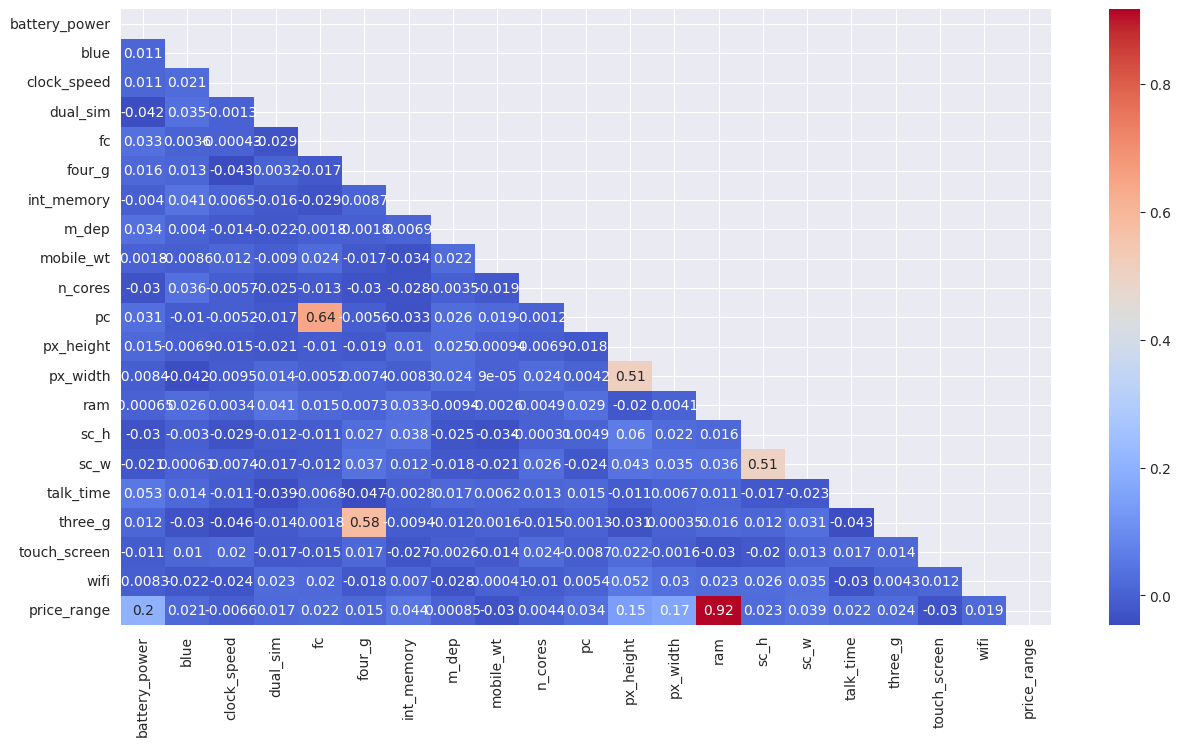

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(15,8))
correlation=dataset.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

# **MACHINE LEARNING ALGORITHIMS**

**#IMPORTING ALL THE LIBRARIES**

In [ ]:
#IMPORTING ALL THE LIBRARIES

from sklearn.metrics import confusion_matrix ,classification_report , precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **FEATURE SELECTION WITH HYPOTHESIS TEST**

CHI-TEST: IT HELPS TO FIGURE OUT RELATION BETWEEN FEATURE AND LABEL WITH 'pvalue<==01'

In [ ]:
ct = pd.crosstab(dataset['wifi'],dataset['price_range'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue:",pvalue)

if pvalue <= 0.1:
  print("Alternate Hypothesis passed. int_memory and price_range have Relationship")
else:
  print("Null hypothesis passed. int_memory and price_range doesnot have Relation")

pvalue: 0.8359905195342198
Null hypothesis passed. int_memory and price_range doesnot have Relation


In [ ]:
# defining new variable for pixels
dataset['pixels'] = dataset['px_height'] * dataset['px_width']

# dropping px_height and px_width
dataset.drop(['px_height', 'px_width'], axis=1, inplace=True)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  ram            2000 non-null   int64  
 12  sc_h           2000 non-null   int64  
 13  sc_w           2000 non-null   int64  
 14  talk_time      2000 non-null   int64  
 15  three_g        2000 non-null   int64  
 16  touch_screen   2000 non-null   int64  
 17  wifi           2000 non-null   int64  
 18  price_ra

In [ ]:
#defining X and Y

x = dataset.drop(['price_range'], axis = 1).values
y = dataset['price_range'].values

In [ ]:
x.shape

(2000, 19)

In [ ]:
y.shape

(2000,)

In [ ]:
#scaling the value of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# **SPLITING TRAINING AND TESTING DATA **

In [ ]:
#SEPERATE THE DATA SET IN TWO TYPE ON TRAINING IS 75% OF DATA AND OTHER TESTING IS 25% OF THE DATA 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=167)
print(x_train.shape)
print(x_test.shape)

(1500, 19)
(500, 19)


## **ML MODEL IMPLEMENTATION** 

HERE WE ARE GONING TO USE MANY ML ALGORITHUM AND COMPARE IT ALL OF THEM, WHICH ALGORITUM WILL GIVE US THE BEST RESULT. THE FOLLOWING ALGORITHUMS ARE:-
1. LOGISTIC REGRESSION
2. K_NEARNEST NEIGHBOR
3. NAIVE BIASE THEOREM 
4. SUPPORT VECTORE CLASSIFICATION
5. DECISION TREE CLASSIFIER 
6. RANDOM FOREST CLASSIFIER 
7. XGB BOOSTCLASSIFIER

# ML MODEL:-1  **IMPLEMENTING LOGISTIC REGRESSION**

In [ ]:
# applying logistic regression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)


LogisticRegression()

In [ ]:
logmodel.coef_

array([[-3.24593090e+00,  5.85553252e-02,  1.79711039e-01,
         4.97911255e-02, -1.70782669e-01, -3.85845551e-02,
        -2.42062698e-01, -1.05961540e-01,  3.50987694e-01,
         8.75820887e-02, -8.07282974e-02, -1.34566470e+01,
         5.66182078e-02, -6.76602454e-02, -2.51141488e-01,
        -1.35068800e-01,  1.65518511e-02,  1.27396757e-01,
        -4.07205607e+00],
       [-7.98092895e-01, -2.58574324e-02, -5.13895302e-02,
         2.37483956e-02,  6.20091318e-02,  8.10800761e-02,
         1.84697839e-02,  1.62084420e-01,  1.76596297e-01,
        -3.07222369e-01,  3.99231483e-02, -3.81373965e+00,
        -4.49276098e-02, -1.35434190e-01,  1.08117612e-01,
        -4.49249751e-02,  2.76826463e-02,  2.49025820e-02,
        -6.47994293e-01],
       [ 7.54878640e-01, -1.97361805e-02, -8.37132744e-02,
        -1.07213150e-01,  2.02829480e-01, -1.77075552e-01,
        -1.74948311e-01, -1.45822676e-01,  1.61632070e-01,
         1.32667234e-01, -1.06137031e-01,  4.04239667e+00,
    

In [ ]:
#predict on the model
#get the predicted probabilities 

trainscore = logmodel.score(x_train,y_train)
testscore = logmodel.score(x_test,y_test)

print("train score : {} ".format(trainscore),'\n')
print("test score : {} ".format(testscore),'\n')

y_predlogi = logmodel.predict(x_test)
print("f1 score :",f1_score(y_test,y_predlogi,average='micro'),'\n')

#get the confusion matrix for both the train and test

print(confusion_matrix(y_test,y_predlogi))

train score : 0.916  

test score : 0.908  

f1 score : 0.908 

[[124   8   0   0]
 [  5  98   6   0]
 [  0   8 100  11]
 [  0   0   8 132]]


In [ ]:
print("precision score :",precision_score(y_test,y_predlogi,average='micro'),'\n')
print("recall score :",recall_score(y_test,y_predlogi,average='micro'),'\n')
print(classification_report(y_test, y_predlogi))

precision score : 0.908 

recall score : 0.908 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       132
           1       0.86      0.90      0.88       109
           2       0.88      0.84      0.86       119
           3       0.92      0.94      0.93       140

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [ ]:
#----------logistic regression----------

probabilityvalues = logmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityvalues,multi_class ='ovr')
print(auc)

0.9874433333333332


**FINALLY MADE RESULT IN LOGISTIC REGRESSION !!** 
  1. I USED LOGISTIC REGRESSION TO CREAT THE MODEL AS I GOT NOT SO GOOD RESULT SO NEXT TRYING TO IMPORTING THE SCORE BY USING HYPERPARAMETER  TUNNING TECHNIQUE.
  2. FOR TRAINING SCORE IS 91% AND TESTING SCORE 90%
  3. FOR TESTING DATASET, I FOUND PRECWESION OF 90% AND RECALL OF 90% AND F1 SCORE OF 90%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS 

  A. I GOT LOW(0) PRICE PRECISION 96% OF RECALL AND 94% AND F1 SCORE OF 95%.

  B. I GOT MEDIUM(1) PRICE PRECESION 86% AND RECALL OF 90% AND F1 SCORE OF 88%.

  C. I GOT HIGH(2) PRICE PRECISION 88% OF RECALL AND 84% AND F1 SCORE OF 86%.

  D. I GOT VERY HIGH(3) PRICE PRECISION 92% OF RECALL AND 94% AND F1 SCORE OF 93%.

**CROSS VALIDATION AND HYPERPARAMETER TUNING**

In [ ]:
#ML MODULE-1  IMPLEMANTING HYPERPARAMETER OPTIMIZING TECHNIQUES

param ={'C':[0.01,0.1,1,10,100,110,120,130]}
grid = GridSearchCV(LogisticRegression(max_iter=500),param,n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 110, 120, 130]})

In [ ]:
#predict on the model 
#get the predicted class

trainscore = grid.score(x_train,y_train)
testscore = grid.score(x_test,y_test)
print("train score : {} ".format(trainscore),'\n')
print("test score : {} ".format(testscore),'\n')

y_predlogi = logmodel.predict(x_test)
print("f1 score :",f1_score(y_test,y_predlogi,average='micro'),'\n')

#get the confusion matrix for both the train and test

print(confusion_matrix(y_test,y_predlogi))


train score : 0.9493333333333334  

test score : 0.94  

f1 score : 0.908 

[[124   8   0   0]
 [  5  98   6   0]
 [  0   8 100  11]
 [  0   0   8 132]]


In [ ]:
print("precision score :",precision_score(y_test,y_predlogi,average ='micro'),'\n')
print("recall score :", recall_score(y_test,y_predlogi, average='micro'),'\n')
print(classification_report(y_test,y_predlogi))

precision score : 0.908 

recall score : 0.908 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       132
           1       0.86      0.90      0.88       109
           2       0.88      0.84      0.86       119
           3       0.92      0.94      0.93       140

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



OUR GOAL IS TO FIND THE BEST HYPERPARAMETER VALUES TO GET THE PREFECT PREDICTION RESULT FROM OUR MODEL. NUT THE QUESTION AREISES HOW TO FIND THESE BEST SET OF HYPERPARAMETER? ONE CAN TRY THE MANNUALA SEARCH METHOD BY USINFG THE HIT AND TRIAL PROCESS AND CAN FIND THE BEST HYPERPARAMETER WHICH WOULD TAKE HUGE TIME TO BUIOLD A SINGLE MODEL.

FOR THIS REASON METHODS LIKE RANDONFORET SEARCH AND GRIDSEARCH WERE INTRODUCED. GRID SEARCH USED A DIFFERENT COMBINATION OF ALL THE SPECIFITEFD HYPERPARAMETER AND THEIR VALUES AND CLACULATION THE PERFORMATION FOR EACH COMBINATION AND SELECT THE BEST VALUES FOR THE HYPERPARAMETER.
THIS MAKES THE PROCESSING THE CONSUMING AND EXPENSIVE BASED ON THE NUMBER OF HYPERPARAMETER INVOLVED.

HERE ARE SOME IMPROVEMENT NOTE DOWN THE IMPROVEMENT WITH UPDATES EVALUATION METRIC SCORE CHART

FOR TRAINING SCORE IS 95% AND TESTING SCORE IS 94%

FOR TESTING DATA SET 

A. I GOT LOW(0) PRICE PRECISION 96% OF RECALL AND 94% AND F1 SCORE OF 95%.

B. I GOT MEDIUM(1) PRICE PRECESION 86% AND RECALL OF 90% AND F1 SCORE OF 88%.

C. I GOT HIGH(2) PRICE PRECISION 88% OF RECALL AND 84% AND F1 SCORE OF 86%.

D. I GOT VERY HIGH(3) PRICE PRECISION 92% OF RECALL AND 94% AND F1 SCORE OF 93%

# **ML MODEL-2 : IMPLEMENTING K_nearst neighbour(knn)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Setup arrays to store training and test accuracies 

neighbors = np.arange(1,100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(x_train,y_train)
  train_accuracy[i] = knn.score(x_train,y_train)

  test_accuracy[i] = knn.score(x_test,y_test)

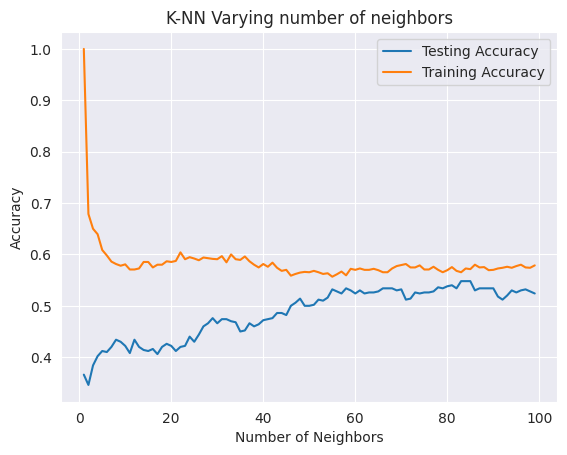

In [ ]:
#generate plot 

plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label= 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#setup a KNN Classifier with K Neighbors
knn = KNeighborsClassifier(n_neighbors =90)
#fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=90)

In [ ]:
#predict on the model 
#get the predicted classes

trainscore = knn.score(x_train,y_train)
testscore = knn.score(x_test,y_test)
print("Train score : {}".format(trainscore),'\n')
print("Test score: {}".format(testscore),'\n')
y_predlogi = knn.predict(x_test)
print('f1 score:', f1_score(y_test,y_predlogi,average='micro'),'\n')
print(confusion_matrix(y_test,y_predlogi))

                      

Train score : 0.57 

Test score: 0.534 

f1 score: 0.534 

[[92 37  3  0]
 [32 48 27  2]
 [ 8 34 61 16]
 [ 1  9 64 66]]


In [ ]:
print('precision score:', precision_score(y_test,y_predlogi,average='micro'),'\n')
print('recall score:', recall_score(y_test,y_predlogi,average='micro'),'\n')
print(classification_report(y_test,y_predlogi))

precision score: 0.534 

recall score: 0.534 

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       132
           1       0.38      0.44      0.41       109
           2       0.39      0.51      0.45       119
           3       0.79      0.47      0.59       140

    accuracy                           0.53       500
   macro avg       0.56      0.53      0.53       500
weighted avg       0.58      0.53      0.54       500



In [ ]:
#----------K_neighbors classifier---------- 
probabilityValues = knn.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class = 'ovr')
print(auc)

0.8015781666666666


**FINALLY MADE RESULT IN K_NEIGHBORS CLASSIFIER!!**

I USED K_NEIGHBORS CLASSIFIER TO CREAT THE MODEL AS I GOT NOT SO GOOD RESULT.

FOR TRAINING SCORE IS 57% AND TESTING SCORE 53%

FOR TESTING DATASET, I FOUND PRECWESION OF 53% AND RECALL OF 53% AND F1 SCORE OF 53%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS

A. I GOT LOW(0) PRICE PRECISION 69% OF RECALL AND 70% AND F1 SCORE OF 69%.

B. I GOT MEDIUM(1) PRICE PRECESION 38% AND RECALL OF 44% AND F1 SCORE OF 41%.

C. I GOT HIGH(2) PRICE PRECISION 39% OF RECALL AND 51% AND F1 SCORE OF 45%.

D. I GOT VERY HIGH(3) PRICE PRECISION 79% OF RECALL AND 47% AND F1 SCORE OF 59%.

# ML MODEL-3 :- IMPLEMENTING NAIVE BAYES CLASSIFIER 

In [ ]:
#APPLY NAIVE_BAYES_CLASSIFIER
NBmodel = GaussianNB()
NBmodel.fit(x_train,y_train)

GaussianNB()

In [ ]:
trainscore = NBmodel.score(x_train,y_train)
testscore = NBmodel.score(x_test,y_test)
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predNB = NBmodel.predict(x_test)
print('f1 score:', f1_score(y_test,y_predNB,average='micro'),'\n')
print(confusion_matrix(y_test,y_predNB))



train score: 0.814 

test score: 0.802 

f1 score: 0.802 

[[116  16   0   0]
 [  6  79  24   0]
 [  0  20  80  19]
 [  0   0  14 126]]


In [ ]:
print('precision score:',precision_score(y_test,y_predNB,average='micro'),'\n')
print('recall score: ',recall_score(y_test,y_predNB,average='micro'),'\n')
print(classification_report(y_test,y_predNB))

precision score: 0.802 

recall score:  0.802 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       132
           1       0.69      0.72      0.71       109
           2       0.68      0.67      0.68       119
           3       0.87      0.90      0.88       140

    accuracy                           0.80       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.81      0.80      0.80       500



In [ ]:
#----------NAIVE BAYES---------- 
probabilityValues = NBmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class='ovr')
print(auc)

0.9518399999999999


**FINALLY MADE RESULT IN NAIVE BAYES!!**

I USED NAIVE BAYES TO CREAT THE MODEL AS I GOT NOT SO GOOD RESULT.

FOR TRAINING SCORE IS 81% AND TESTING SCORE 80%

FOR TESTING DATASET, I FOUND PRECWESION OF 80% AND RECALL OF 80% AND F1 SCORE OF 80%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS

A. I GOT LOW(0) PRICE PRECISION 95% OF RECALL AND 88% AND F1 SCORE OF 91%.

B. I GOT MEDIUM(1) PRICE PRECESION 69% AND RECALL OF 72% AND F1 SCORE OF 71%.

C. I GOT HIGH(2) PRICE PRECISION 68% OF RECALL AND 67% AND F1 SCORE OF 68%.

D. I GOT VERY HIGH(3) PRICE PRECISION 87% OF RECALL AND 90% AND F1 SCORE OF 88%.

MODEL 4 :- **IMPLEMENTING SUPPORT VECTOR MACHINE CLASSIFIER**

In [ ]:
#APPLYING SUPPORT VECTOR MACHINE CLASSIFIER 
svcmodel = SVC(probability=True)
svcmodel.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

trainscore = svcmodel.score(x_train,y_train)
testscore = svcmodel.score(x_test,y_test)

print("train score:{}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predsvc = svcmodel.predict(x_test)
print('f1 score :', f1_score(y_test, y_predsvc, average='micro'),'\n')
print(confusion_matrix(y_test,y_predsvc))



train score:0.954 

test score: 0.834 

f1 score : 0.834 

[[114  18   0   0]
 [  8  89  12   0]
 [  0  13  95  11]
 [  0   0  21 119]]


In [ ]:
print('precision score:',precision_score(y_test,y_predsvc,average='micro'),'\n')
print('recall score:',recall_score(y_test,y_predsvc,average='micro'),'\n')
print(classification_report(y_test,y_predsvc))

precision score: 0.834 

recall score: 0.834 

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       132
           1       0.74      0.82      0.78       109
           2       0.74      0.80      0.77       119
           3       0.92      0.85      0.88       140

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.84      0.83      0.84       500



In [ ]:
#----------SUPPORT VECTOR CLASSIFICATION---------- 

probabilityValues = svcmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class='ovr')
print(auc)

0.993303


**FINALLY MADE RESULT IN SUPPORT VECTOR CLASSIFICATION!!**

I USED VECTOR CLASSIFICATION FOR TRAINING SCORE IS 95% AND TESTING SCORE 83%

FOR TESTING DATASET, I FOUND PRECWESION OF 83% AND RECALL OF 83% AND F1 SCORE OF 83%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS

A. I GOT LOW(0) PRICE PRECISION 93% OF RECALL AND 86% AND F1 SCORE OF 90%.

B. I GOT MEDIUM(1) PRICE PRECESION 74% AND RECALL OF 82% AND F1 SCORE OF 78%.

C. I GOT HIGH(2) PRICE PRECISION 74% OF RECALL AND 80% AND F1 SCORE OF 77%.

D. I GOT VERY HIGH(3) PRICE PRECISION 92% OF RECALL AND 85% AND F1 SCORE OF 88%.

# **ML MODEL 4 :- IMPLEMENTING DECISION TREE**

In [ ]:
#APPLY DECISION TREE 
DTmodel=DecisionTreeClassifier(max_depth=6)
DTmodel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
trainscore = DTmodel.score(x_train,y_train)
testscore = DTmodel.score(x_test,y_test)
y_predDT = DTmodel.predict(x_test)

print("train score: {}".format (trainscore),'\n')
print("test score:{}".format(testscore),'\n')
print('f1 score:', f1_score(y_test,y_predDT,average='micro'),'\n')
print(confusion_matrix(y_test,y_predDT))

train score: 0.93 

test score:0.862 

f1 score: 0.8619999999999999 

[[117  15   0   0]
 [  1  95  13   0]
 [  0  15  91  13]
 [  0   0  12 128]]


In [ ]:
print('precision score :', precision_score(y_test,y_predDT,average='micro'),'\n')
print('recall score :', recall_score(y_test,y_predDT,average='micro'),'\n')
print(classification_report(y_test,y_predDT))


precision score : 0.862 

recall score : 0.862 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       132
           1       0.76      0.87      0.81       109
           2       0.78      0.76      0.77       119
           3       0.91      0.91      0.91       140

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.87      0.86      0.86       500



**FINALLY MADE RESULT IN DECISION TREE!!**

I USED DECISION TREE FOR TRAINING SCORE IS 93% AND TESTING SCORE 86%

FOR TESTING DATASET, I FOUND PRECWESION OF 86% AND RECALL OF 86% AND F1 SCORE OF 86%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS

A. I GOT LOW(0) PRICE PRECISION 99% OF RECALL AND 89% AND F1 SCORE OF 94%.

B. I GOT MEDIUM(1) PRICE PRECESION 76% AND RECALL OF 87% AND F1 SCORE OF 81%.

C. I GOT HIGH(2) PRICE PRECISION 78% OF RECALL AND 76% AND F1 SCORE OF 77%.

D. I GOT VERY HIGH(3) PRICE PRECISION 91% OF RECALL AND 91% AND F1 SCORE OF 91%.

In [ ]:
#CROSS VALIDATION 
from sklearn.model_selection import GridSearchCV
gridDT = GridSearchCV(DTmodel, param_grid ={'max_depth':(5,30),'max_leaf_nodes':(10,100)},scoring = 'accuracy', cv=5, verbose=24)
gridDT.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.777 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.783 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.837 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.783 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.813 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
#find the best params value 
gridDT.best_params_

{'max_depth': 30, 'max_leaf_nodes': 100}

In [ ]:
#find best estimater 
gridDT.best_estimator_

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=100)

In [ ]:
DTgmodel = DecisionTreeClassifier(max_depth=30, max_leaf_nodes=100)
DTgmodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=100)

In [ ]:
#predict the model 
#get the predicted probabilities 

trainscore = DTgmodel.score(x_train,y_train)
testscore = DTgmodel.score(x_test,y_test)
print("train score: {}".format(trainscore),'\n')
print('test score: {}'.format(testscore),'\n')
y_predgDT = DTgmodel.predict(x_test)
print('f1 score:', f1_score(y_test,y_predgDT,average='micro'),'\n')
print('f1 score:',f1_score(y_test,y_predgDT,average='micro'),'\n')

print(confusion_matrix(y_test,y_predDT))

train score: 0.9833333333333333 

test score: 0.862 

f1 score: 0.8619999999999999 

f1 score: 0.8619999999999999 

[[117  15   0   0]
 [  1  95  13   0]
 [  0  15  91  13]
 [  0   0  12 128]]


In [ ]:
#prediction 
y_pred_test = DTgmodel.predict(x_test)
y_pred_train = DTgmodel.predict(x_train)

#Evaluation metrics for test 

print('precision score:',precision_score(y_test,y_predgDT,average='micro'),'\n')
print('recall score :', recall_score(y_test,y_predgDT,average='micro'),'\n')
print(classification_report(y_test,y_pred_test))

precision score: 0.862 

recall score : 0.862 

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       132
           1       0.78      0.86      0.82       109
           2       0.81      0.70      0.75       119
           3       0.87      0.94      0.90       140

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [ ]:
#----------decision tree----------
probabilityValues = DTmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class='ovr')
print(auc)

0.9788135


**FINALLY MADE RESULT IN DECISION TREE CLASSIFIER!!**

I USED DECISION TREE CLASSIFIER FOR TRAINING SCORE IS 98% AND TESTING SCORE 86%

FOR TESTING DATASET, I FOUND PRECWESION OF 86% AND RECALL OF 86% AND F1 SCORE OF 86%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS

A. I GOT LOW(0) PRICE PRECISION 97% OF RECALL AND 92% AND F1 SCORE OF 95%.

B. I GOT MEDIUM(1) PRICE PRECESION 78% AND RECALL OF 86% AND F1 SCORE OF 82%.

C. I GOT HIGH(2) PRICE PRECISION 81% OF RECALL AND 70% AND F1 SCORE OF 75%.

D. I GOT VERY HIGH(3) PRICE PRECISION 87% OF RECALL AND 94% AND F1 SCORE OF 90%.

## ML MODEL 5 :- IMPLEMENTIG RANDOM FOREST CLASSIFIER 

In [ ]:
#APPLYING RANDOM FOREST CLASSIFIER 
RFmodel = RandomForestClassifier(criterion='entropy', max_depth=9)
RFmodel.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [ ]:
trainscore = RFmodel.score(x_train,y_train)
testscore = RFmodel.score(x_test,y_test)
y_predRF = RFmodel.predict(x_test)

print("train score: {}".format (trainscore),'\n')
print("test score:{}".format(testscore),'\n')
print('f1 score:', f1_score(y_test,y_predRF,average='micro'),'\n')
print(confusion_matrix(y_test,y_predRF))

train score: 0.9973333333333333 

test score:0.874 

f1 score: 0.874 

[[123   9   0   0]
 [  4  94  11   0]
 [  0  16  92  11]
 [  0   0  12 128]]


In [ ]:

print('precision score:',precision_score(y_test,y_predRF,average='micro'),'\n')
print('recall score :', recall_score(y_test,y_predRF,average='micro'),'\n')
print(classification_report(y_test,y_predRF))

precision score: 0.874 

recall score : 0.874 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       132
           1       0.79      0.86      0.82       109
           2       0.80      0.77      0.79       119
           3       0.92      0.91      0.92       140

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.88      0.87      0.87       500



In [ ]:
#----------RANDOM FOREST---------- 
probabilityValues = RFmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityValues,multi_class='ovr')
print(auc)

0.9976773333333333


**FINALLY MADE RESULT IN RANDOM FOREST!!**

I USED RANDOM FOREST FOR TRAINING SCORE IS 99% AND TESTING SCORE 87%

FOR TESTING DATASET, I FOUND PRECWESION OF 87% AND RECALL OF 87% AND F1 SCORE OF 87%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS

A. I GOT LOW(0) PRICE PRECISION 97% OF RECALL AND 93% AND F1 SCORE OF 95%.

B. I GOT MEDIUM(1) PRICE PRECESION 79% AND RECALL OF 86% AND F1 SCORE OF 82%.

C. I GOT HIGH(2) PRICE PRECISION 80% OF RECALL AND 77% AND F1 SCORE OF 79%.

D. I GOT VERY HIGH(3) PRICE PRECISION 92% OF RECALL AND 91% AND F1 SCORE OF 92%.

In [ ]:
#CROSS VALIDATION
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
          'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10,20,40]}


rf = RandomForestClassifier()
rfgd = GridSearchCV(rf,params,scoring='accuracy', cv=3)
rfgd.fit(x,y)

KeyboardInterrupt: ignored

In [ ]:
# cross-validation
params = {'n_estimators': [10, 50, 100, 200],
          'max_depth': [10, 20, 30, 40],
          'min_samples_split': [2, 4, 6],
          'max_features': ['sqrt', 4, 'log2', 'auto'],
          'max_leaf_nodes': [10, 20, 40]}

rf = RandomForestClassifier()
rfgd = GridSearchCV(rf, params, scoring='accuracy', cv=3)
rfgd.fit(x, y)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

## HYPER TUNNING OF RANDOM FOREST CLASSIFIER 

In [ ]:
#FINDING THE BEST PARAMS VALUES 
rfgd.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
#find the best estimeter 
rfgd.best_estimator_

RandomForestClassifier(max_depth=20, max_leaf_nodes=40, min_samples_split=6)

In [ ]:
#find the best score 
rfgd.best_score_

0.8559976768372571

In [ ]:
rfgd = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                              criterion='gini', max_depth=30, max_features='log2',
                              max_leaf_nodes=40, max_samples=None,
                              min_impurity_decrease=0.0,
                              min_samples_leaf=1, min_samples_split=4,
                              min_weight_fraction_leaf=0.0, n_estimators=200,
                              n_jobs=None, oob_score=False, random_state=None,
                              verbose=0, warm_start=False)

rfgd.fit(x_train, y_train)


RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
#prediction
y_pred_test = rfgd.predict(x_test)
y_pred_train = rfgd.predict(x_train)

trainscore = RFmodel.score(x_train, y_train)
testscore = RFmodel.score(x_test, y_test)
print('Classification Report for Random Forest (test set)=')
print("train score: {}".format(trainscore),'\n')
print('test score: {}'.format(testscore),'\n')
print('precision score:', precision_score(y_test, y_pred_test, average='micro'),'\n')
print('recall score:', recall_score(y_test, y_pred_test, average='micro'),'\n')
print(classification_report(y_test, y_pred_test))


Classification Report for Random Forest (test set)=
train score: 0.9973333333333333 

test score: 0.874 

precision score: 0.86 

recall score: 0.86 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       132
           1       0.77      0.84      0.80       109
           2       0.77      0.73      0.75       119
           3       0.91      0.91      0.91       140

    accuracy                           0.86       500
   macro avg       0.85      0.86      0.85       500
weighted avg       0.86      0.86      0.86       500



# **ML MODEL 6 :- IMPLEMENTING XGBclassifier**

In [ ]:
#Applying XGBoost

from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 5, learning_rate=0.1)
xgb.fit(x_train,y_train)
XGBClassifier(max_depth=5, objective ='multi:softprob')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
#prediction 

y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

#evaluation metrics for test 

print('train_score:',accuracy_score(y_train,y_pred_train),'\n')
print('test_score:',accuracy_score(y_test,y_pred_test),'\n')
print('precision score:', precision_score(y_test,y_pred_test,average='micro'),'\n')
print('recall score:',recall_score(y_test,y_pred_test,average='micro'),'\n')
score = classification_report(y_test,y_pred_test)
print('classification Report for XGboost(test set)=')
print(score)

train_score: 1.0 

test_score: 0.894 

precision score: 0.894 

recall score: 0.894 

classification Report for XGboost(test set)=
              precision    recall  f1-score   support

           0       0.98      0.89      0.94       132
           1       0.80      0.94      0.87       109
           2       0.88      0.80      0.84       119
           3       0.91      0.94      0.92       140

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.90      0.89      0.89       500



**FINALLY MADE RESULT IN XGB CLASSIFIER!!**

I USED XGB CLASSIFIER FOR TRAINING SCORE IS 100% AND TESTING SCORE 89%

FOR TESTING DATASET, I FOUND PRECESION OF 89% AND RECALL OF 89% AND F1 SCORE OF 89%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS

A. I GOT LOW(0) PRICE PRECISION 98% OF RECALL AND 89% AND F1 SCORE OF 94%.

B. I GOT MEDIUM(1) PRICE PRECESION 80% AND RECALL OF 94% AND F1 SCORE OF 87%.

C. I GOT HIGH(2) PRICE PRECISION 88% OF RECALL AND 80% AND F1 SCORE OF 84%.

D. I GOT VERY HIGH(3) PRICE PRECISION 91% OF RECALL AND 94% AND F1 SCORE OF 92%.

In [ ]:
#cross validation 

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(xgb, param_grid={'n_estimators':(10,200), 'learning_rate': [1,0.5,0.1,0.01,0.001], 'max_depth':(5,10),
                                     'gamma': [1.5,1.8], 'subsample':[0.3,0.5,0.8]}, cv=5, scoring='accuracy', verbose=10)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.847 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.857 total time=   0.1s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.863 total time=   0.8s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.860 total time=   0.3s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
#find best params value 
grid.best_params_

{'gamma': 1.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 200,
 'subsample': 0.5}

In [ ]:
#find best estimeter 
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
#applying best etimeter value in xgboost
model = XGBClassifier(gamma=1.5,max_depth=10,n_estimator=200,
                      objective='multi:softprob', subsample=0.5)
model.fit(x_train,y_train)

[16:21:40] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimator=200, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
#predicit on the model 
#get the predicted probability 

trainscore = model.score(x_train,y_train)
testscore = model.score(x_test,y_test)
print("train score: {}".format(trainscore),'\n')
print("test score: {}".format(testscore),'\n')
y_predxgb = model.predict(x_test)
print('f1 score:', f1_score(y_test,y_predxgb,average='micro'),'\n')


train score: 0.988 

test score: 0.908 

f1 score: 0.908 



In [ ]:
#evaluation metrics for train
print('precision score:', precision_score(y_test,y_predxgb,average='micro'),'\n')
print('recall score:',recall_score(y_test,y_predxgb,average='micro'),'\n')
score= classification_report(y_train,y_pred_train)
print('classification Report for tuned XGBoost(Train set)=')
print(score)


precision score: 0.908 

recall score: 0.908 

classification Report for tuned XGBoost(Train set)=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       381
           3       1.00      1.00      1.00       360

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [ ]:
#----------XGBoosting----------

probabilityvalues = RFmodel.predict_proba(x)
auc = roc_auc_score(y,probabilityvalues,multi_class='ovr')
print(auc)

0.9976773333333333


**FINALLY MADE RESULT IN XGB CLASSIFIER!!**

I USED XGB CLASSIFIER FOR TRAINING SCORE IS 98% AND TESTING SCORE 90%

FOR TESTING DATASET, I FOUND PRECESION OF 90% AND RECALL OF 90% AND F1 SCORE OF 90%. BUT I AM ALSO INTRESETED TO SEE THE RESULT FOR MOBILE PRICE RANGE RESULT AS

A. I GOT LOW(0) PRICE PRECISION 100% OF RECALL AND 100% AND F1 SCORE OF 100%.

B. I GOT MEDIUM(1) PRICE PRECESION 100% AND RECALL OF 100% AND F1 SCORE OF 100%.

C. I GOT HIGH(2) PRICE PRECISION 100% OF RECALL AND 100% AND F1 SCORE OF 100%.

D. I GOT VERY HIGH(3) PRICE PRECISION 100% OF RECALL AND 100% AND F1 SCORE OF 100%.

SO, I HAVE CHOOSEN XGBOOST MODEL AND LOGISTIC REGRESSION WHICH IS HYPERPARAMETER OPTIMIZED FIRST OF ALL I NEED ACCURACY FOR THE MOBILE PRICE PREDICTION. THUS FOR GREATER ACCURACY WE USED KERNEL SVM , RANDOMFOREST, XGBOOST. SO, I TRIED BOTH LOGISCTIC AND XGBOOST. HERE IS THEIR EVALUATION METRICS.

CONCLUSION 

FINALLY MADE IT !!

IN THIS ARTICLE WE LOOKED AT CLASSIFICATION, CLASSIFIER REPRESENT THE INTERSECTION OF ADVANCED MACHINE THEORY AND PRACTICAL APPLICATION. THERE ALGORITHMS ARE MORE THAN JUST A SORTING MECHANISM FOR ORGANISING UNLABELED DATA INSTANCES INTO DISTINCT GROUPING, CLASSIFIER INCLUDE A UNIQUE SET OF DYNAMICS RULES THAT INCLUDE AN INTERPRETETION MECHANICS FOR DEALING WITH AMBIGUOUS OR UNKNOWN VALUES ALL OF WHICH AR SUITED TO THE KIND OF INPUT BEING ANALYSED. MOSTLY CLASSIFIER ALSO UTILISES PROBABILITY ESTIMATES WHICH ENABLES END-USER TO ADJUST DATA CATEGORIZATION  USING UTILITY FUNCTIONS. 

1. FROM EDA WE CAN SEE THAT HERE ARE MOBILE PHONMES IN 4 PRICE RANGE. THE NU. OF ELEMENT IS SIMILAR.
2. HALF THE DEVICE HAVE BLUETOOTH AND HALF DONT.
3. THERE IS GRADUAL INCREASE IN BATTERY AS THE PRICE RANGE INCREASES.
4. RAM HAS CONTINUOUS INCREASE WITH PRICE RANGE WHILE MOVING FROM LOW COST TO VERY HIGH COST.
5. COSTLY PHONES ARE LIGHTER 
6. RAM, BATTERY POWER, PXELS PLAYED MORE SIGNIFICANT ROLE IN DECIDING THE PRICE RANGE OF MIBILE PHONES.
7. FROM ALL THE ABOVE EXPERIMENTS WE CAN CONCLUDE THAT **XGBOOSTING AND LINEAR REGRESSION** WITH USING HYPERPARAMETER WE GOT THE BEST RESULTS.